# Project Description

We are analyzing a dataset related to home equity loans, which includes a target variable indicating whether a loan resulted in a loss (i.e., became a "Bad" loan that was not repaid).

**Technical Objective**:
Our primary technical goal is to identify key factors that can help predict which loans are likely to go bad.

**Business Objective**:
From a business perspective, the aim is to help the bank reduce financial losses from defaulted loans while still maintaining revenue from the majority of loans that are repaid successfully.

**Evaluation Considerations**:
It’s important to strike a balance between minimizing bad loans and preserving a healthy volume of good loans. Therefore, our model’s objective cannot be solely focused on maximizing accuracy or detecting bad loans (the positive class). Overemphasizing this could lead to rejecting too many potentially good loans, negatively impacting profitability. A more balanced evaluation strategy—considering metrics such as precision, recall, and cost-sensitive performance—is essential.

**Data Location:**

This datset is available at following location:

https://www.kaggle.com/datasets/ajay1735/hmeq-data

# Setup and Libraries

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hmeq.csv to hmeq.csv


In [ ]:
!pwd

/content


In [ ]:
import os
os.listdir(".")

['.config', 'hmeq.csv', 'sample_data']

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8cfec78d6d86a10c1416de57514f075f999e87e39615be8ec02b4e8f9076a3df
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
!pip install calmap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
import calmap

#To scale the data using z-score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Data Description:



The **Home Equity (HMEQ) dataset** includes baseline information and loan performance data for **5,960 recent home equity loan applicants**. The main target variable, **BAD**, is binary and indicates whether an applicant eventually **defaulted** or became **severely delinquent** on their loan. Such adverse outcomes occurred in **1,189 cases**, accounting for approximately **20%** of the dataset.

### Target Variable:

* **BAD**:

  * `1` = The client defaulted on the loan
  * `0` = The loan was repaid successfully

### Input Variables (Features):

1. **LOAN** – Amount of loan approved
2. **MORTDUE** – Outstanding amount on the existing mortgage
3. **VALUE** – Current appraised value of the property
4. **REASON** – Purpose of the loan:

   * `HomeImp` = Home improvement
   * `DebtCon` = Debt consolidation (i.e., using a new loan to pay off other debts)
5. **JOB** – Applicant’s occupation (e.g., Manager, Self-employed, etc.)
6. **YOJ** – Years the applicant has been at their current job
7. **DEROG** – Number of major derogatory reports (e.g., serious delinquencies or late payments)
8. **DELINQ** – Number of delinquent credit lines (typically 30–60 days overdue)
9. **CLAGE** – Age of the oldest credit line, in months
10. **NINQ** – Number of recent credit inquiries
11. **CLNO** – Total number of current credit lines
12. **DEBTINC** – Debt-to-income ratio (monthly debt payments divided by gross monthly income)




## Load and Understand Data

In [ ]:
orig_data = pd.read_csv("./hmeq.csv")
# Copying data to another variable to avoid any changes to original data
data = orig_data.copy()


#display(train_df.head(), train_df.describe(include='all'))
#print(train_df.shape)
#train_df.info()

In [ ]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [ ]:
data.shape

(5960, 13)

We have 5960 rows with 12 variables and one Target

**Check the Data types**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


* We have 11 numerical columns and two are of object type

* We know there are total of 5960 rows. Based on output of info above, we can see that most columns have some missing values. DEBTINC column seems to have maximum number of missing values **

**Check for Missing values**

In [ ]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
# Check the percentage of missing values in the each column
data.isnull().sum() * 100 / len(data)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64



For features such as **VALUE**, **JOB**, and **REASON**, the percentage of missing values is relatively low and likely manageable through basic imputation.

However, **DELINQ** and **DEROG** each have approximately **10%** missing data. For these variables, we will need to evaluate whether to drop the affected rows or apply appropriate imputation techniques to retain useful information.

The **DEBTINC** (debt-to-income ratio) feature presents a greater challenge, with over **20%** of its values missing. This is a substantial portion of the dataset, making row deletion impractical. Instead, we’ll need to consider more advanced strategies such as predictive imputation or using model-based techniques to preserve data integrity.


**Convert Object to Category columns**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')
print(cols)
for i in cols:
    data[i] = data[i].astype('category')

data.info()

['REASON', 'JOB', 'BAD']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


**Analyze Summary Statistics of the dataset**

In [ ]:
data.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


**Analysis**


The features **LOAN**, **MORTDUE**, and **VALUE** exhibit some outliers. This is expected, as these variables are closely related: generally, the more valuable a property is, the larger the mortgage and loan amounts are likely to be.

Most customers have **no derogatory reports** or **delinquent credit lines**, which aligns with typical financial behavior—most individuals do repay their debts on time. However, it’s important to analyze how historical credit issues (when present) may influence the likelihood of loan default in our context.

For **recent credit inquiries (NINQ)**, most customers have made up to 2 inquiries, but the data includes values as high as 17, indicating possible outliers. These could represent individuals actively seeking credit, either due to financial stress or shopping for the best loan terms—something worth investigating further.

Similarly, the **age of the oldest credit line (CLAGE)** for most customers is below 230 months. Higher values may indicate outliers and will need to be assessed for their impact on the model.


In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Analysis**

* Target variable BAD has only two values as expected
* Loan Reason has two unique values
* We have six unique values for JOB feature
* Reason and Job have some missing values

# Exploratory Data Analysis (EDA) and Visualization

## Univariate Analysis
Let us look into some features at their own. Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### 1. Univariate Analysis - Numerical Data

Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
#df.shape

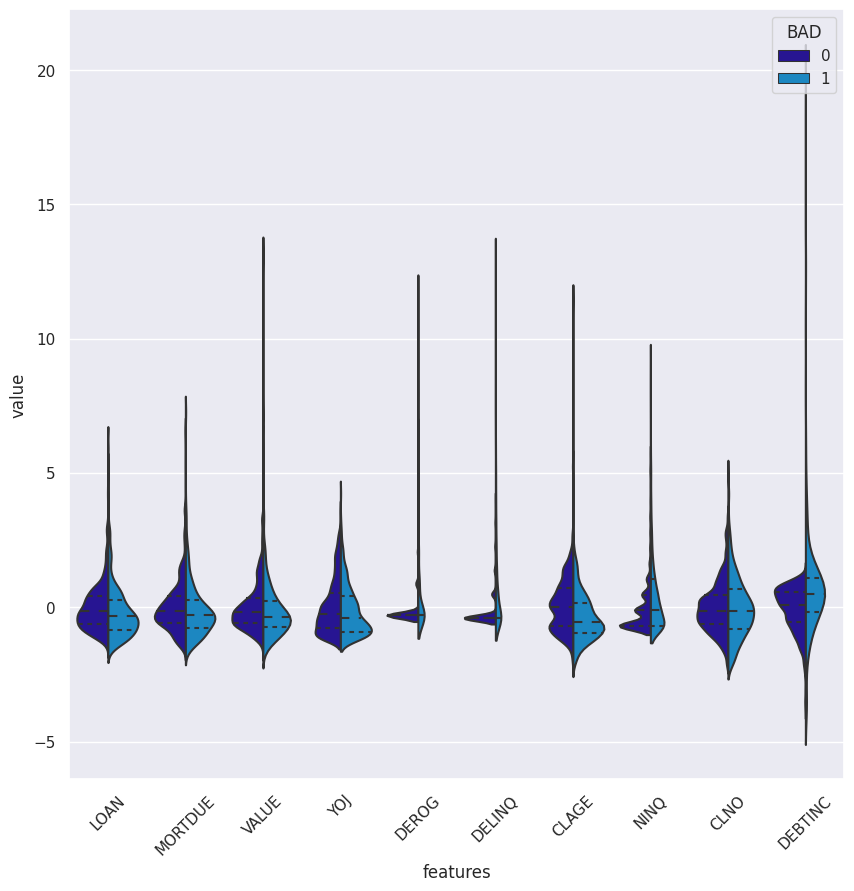

In [ ]:
# features
# Select numeric columns.
y = data.BAD
drop_cols = ['BAD']
x = data.drop(drop_cols,axis = 1 )
num_features = x.select_dtypes('number')
x = data[num_features.columns]

data_scaled = (x - x.mean()) / (x.std())              # standardization
data_copy = pd.concat([y,data_scaled],axis=1)
data_copy = pd.melt(data_copy,id_vars="BAD",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="BAD", data=data_copy,split=True, inner="quart")
plt.xticks(rotation=45);

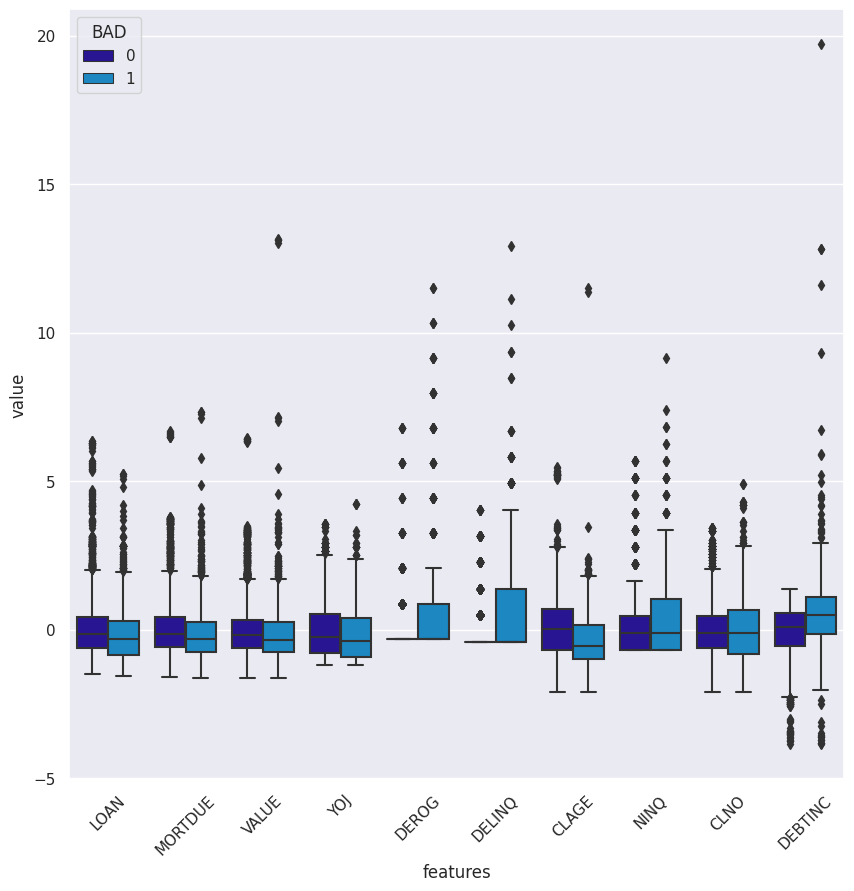

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="BAD", data=data_copy)
plt.xticks(rotation=45);

**Insights**

Based on the plots above, higher values of **DEROG** (derogatory reports) and **DELINQ** (delinquent credit lines) appear to be strong indicators of loan default (BAD).

Additionally, a **high number of recent credit inquiries (NINQ)** and an elevated **debt-to-income ratio (DEBTINC)** also seem to be associated with increased risk.

While **MORTDUE** and **VALUE** are strongly correlated—as expected—they do not show a significant impact on the loan outcome. Therefore, we might consider dropping one of these features to reduce redundancy and potential multicollinearity in the model.


In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, # Number of rows of the subplot grid= 2
                                           sharex=True, # x-axis will be shared among all subplots
                                           gridspec_kw={"height_ratios": (.25, .75)},
                                           figsize=figsize) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    if bins:
        sns.histplot(feature, kde=False, ax=ax_hist2, bins=bins, color="blue") # For histogram with bins
    else:
        sns.histplot(feature, kde=False, ax=ax_hist2, color="blue") # For histogram without bins
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    # Add titles and labels
    ax_box2.set(title='Boxplot', yticks=[])
    ax_hist2.set(title='Histogram')

    # Remove x-axis label for the boxplot
    ax_box2.set(xlabel='')

    # Show the plot
    plt.show()


Using the above function, let's first analyze the Histogram and Boxplot for LOAN

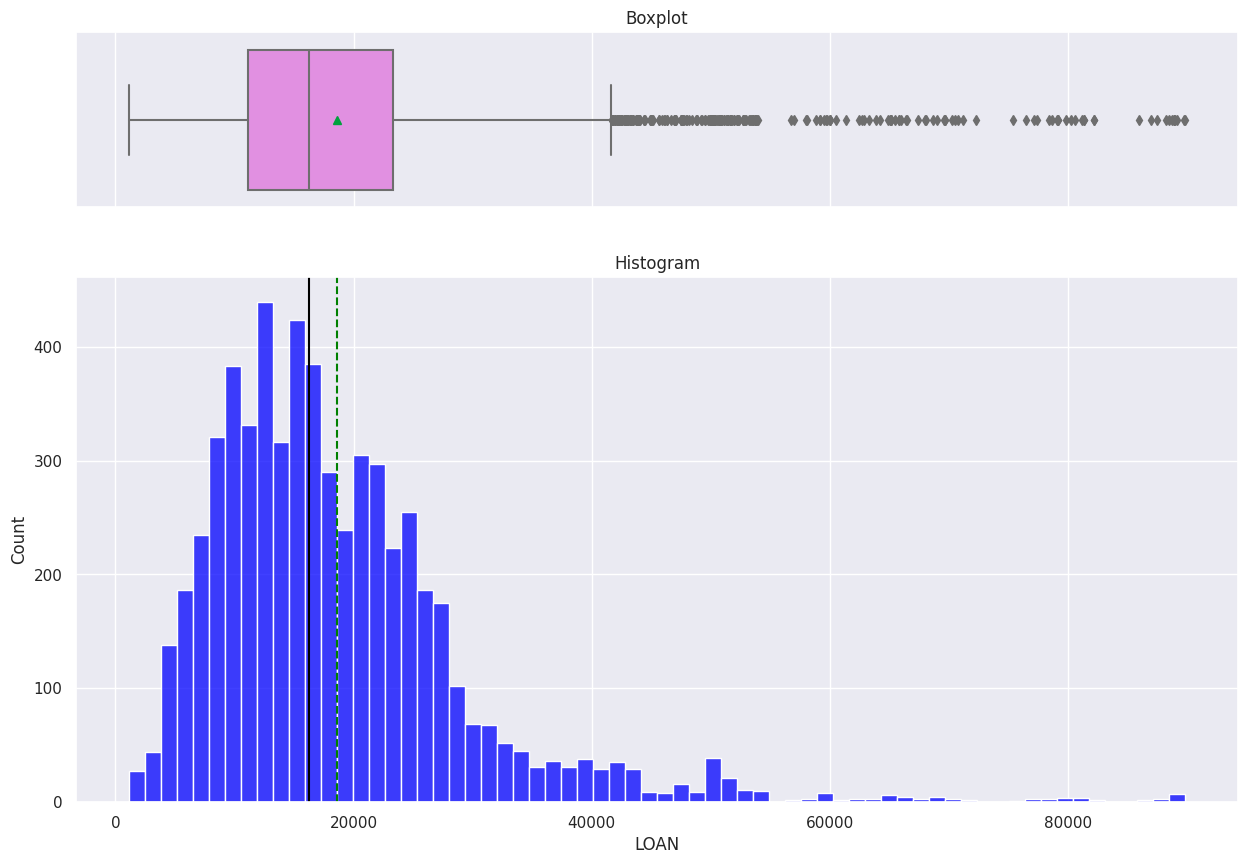

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

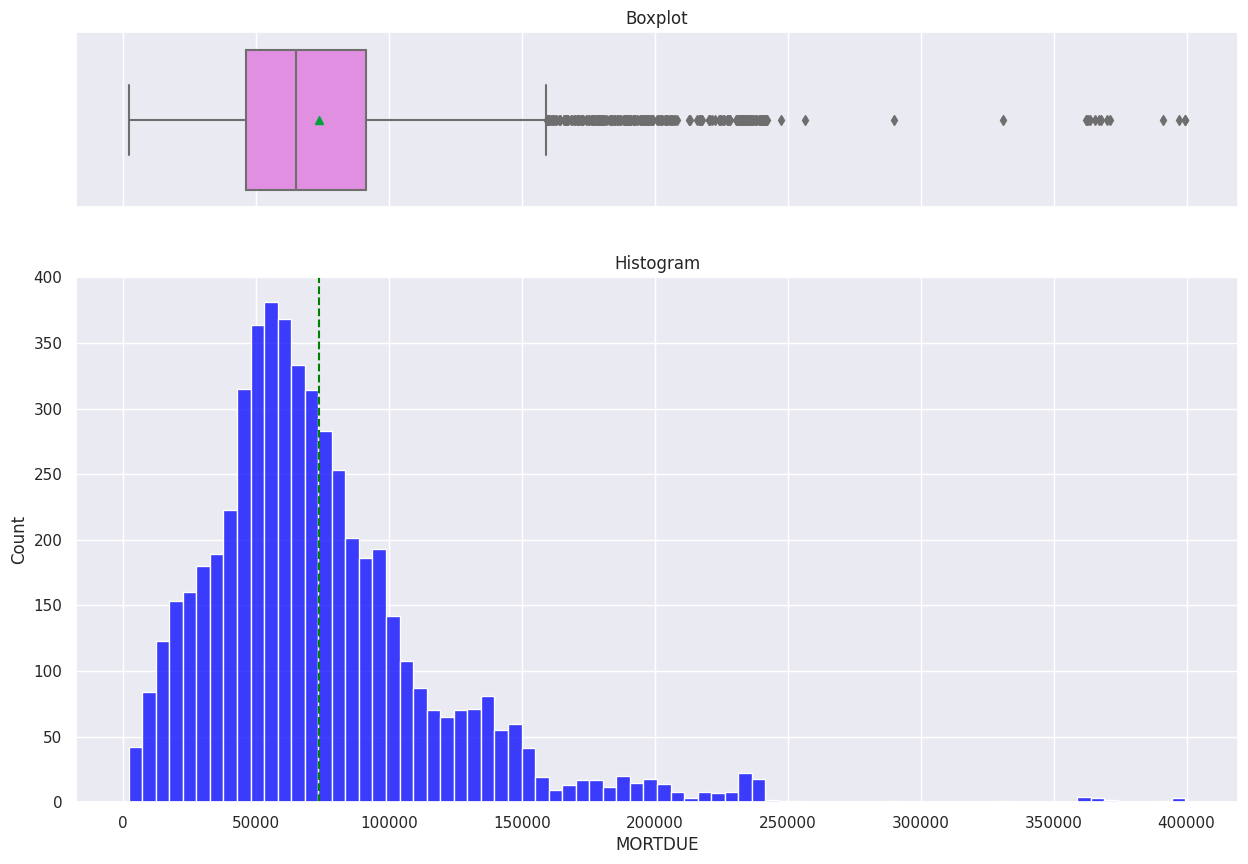

In [ ]:
# Build the histogram boxplot for MORTDUE
histogram_boxplot(data['MORTDUE'])

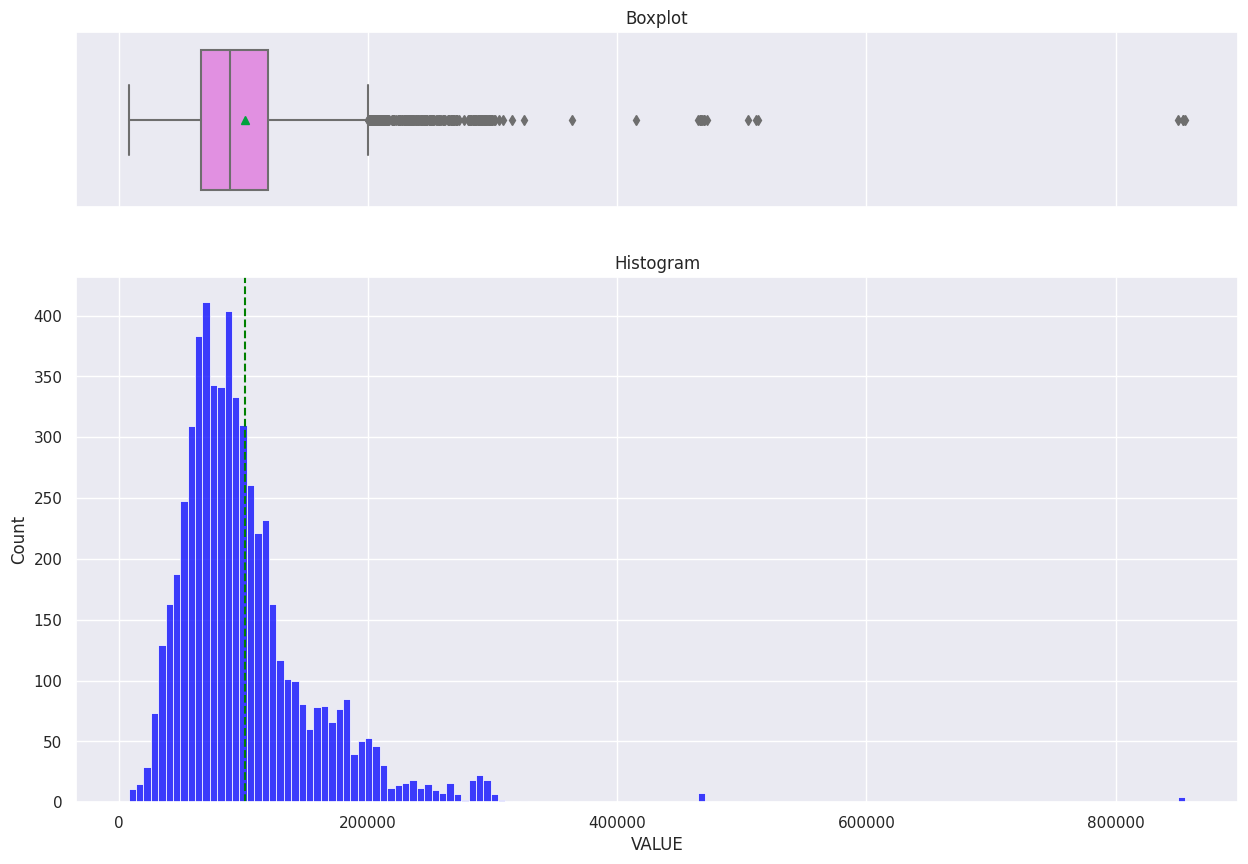

In [ ]:
# Build the histogram boxplot for VALUE
histogram_boxplot(data['VALUE'])

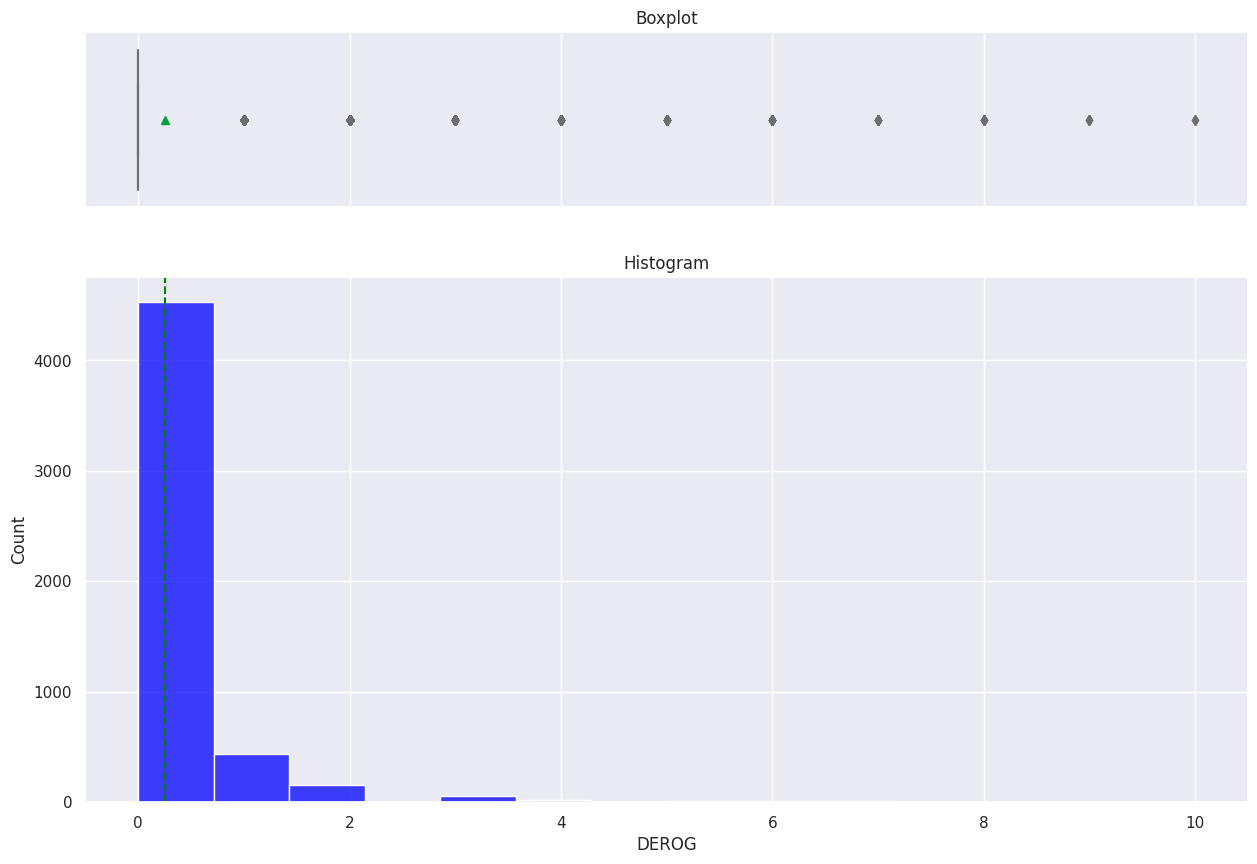

In [ ]:
# Build the histogram boxplot for DEROG
histogram_boxplot(data['DEROG'])

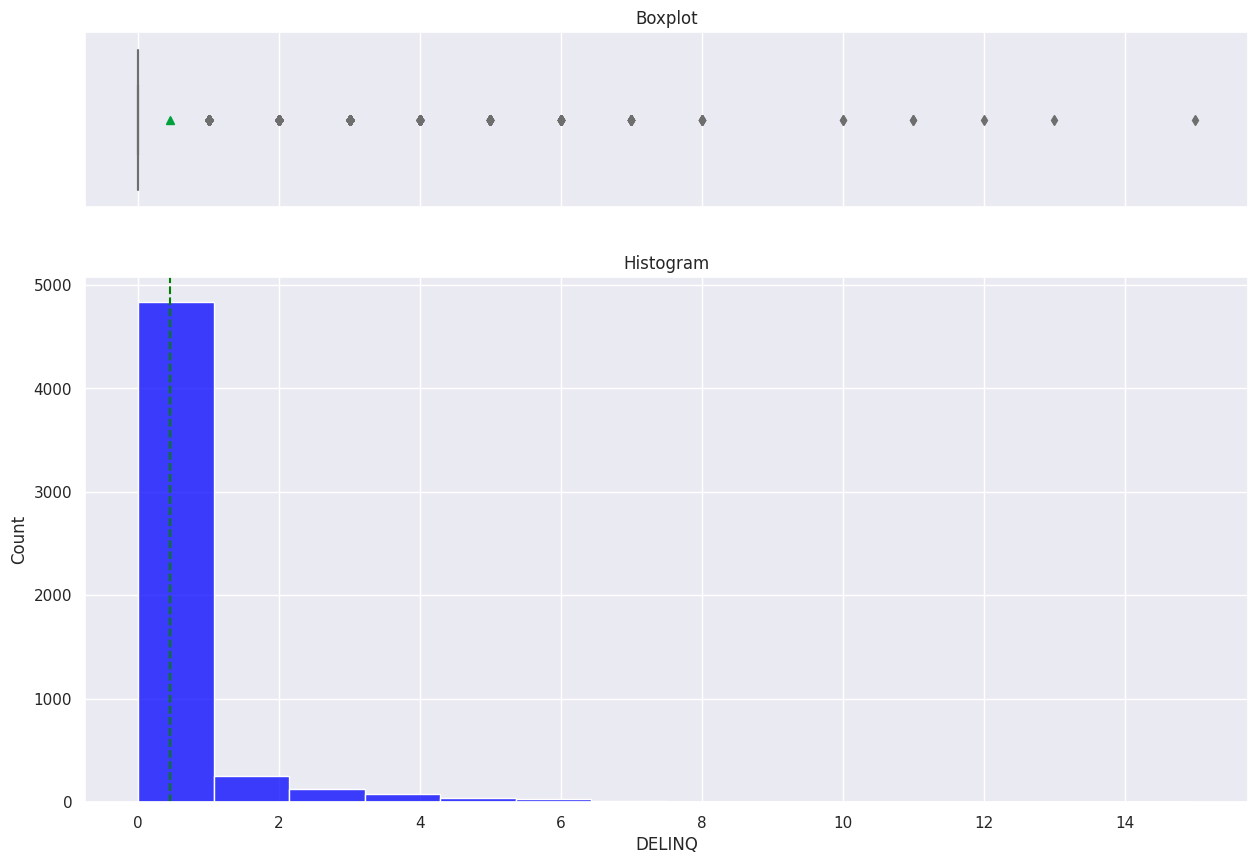

In [ ]:
# Build the histogram boxplot for DELINQ
histogram_boxplot(data['DELINQ'])

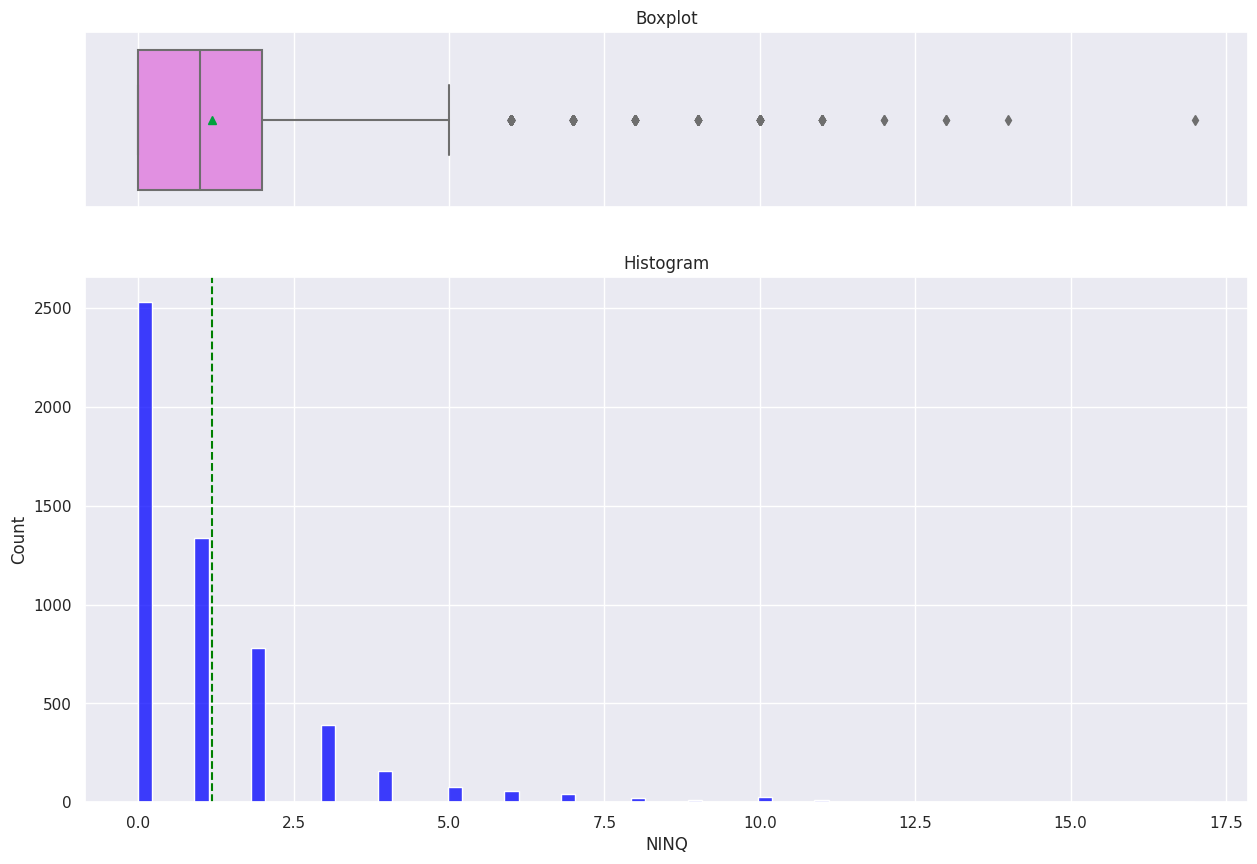

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['NINQ'])

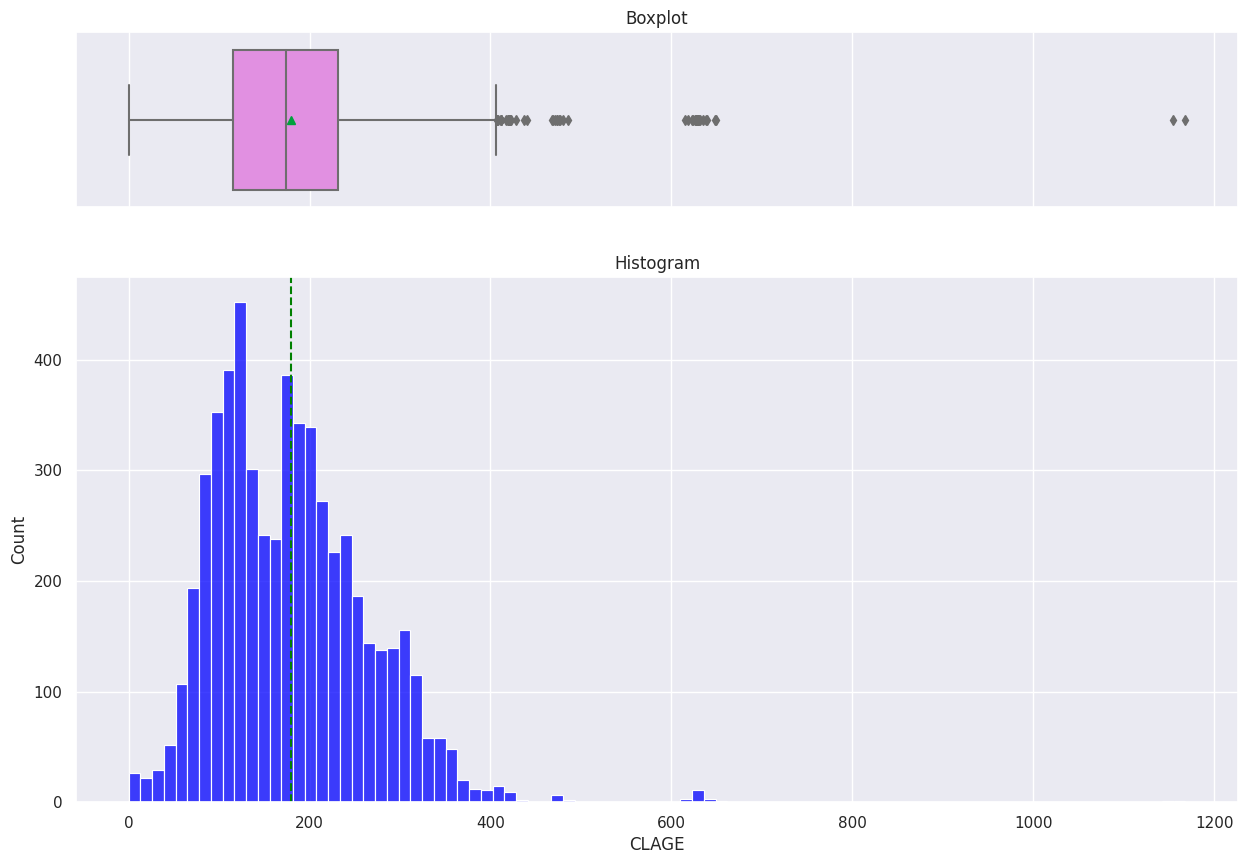

In [ ]:
# Build the histogram boxplot for CLAGE
histogram_boxplot(data['CLAGE'])

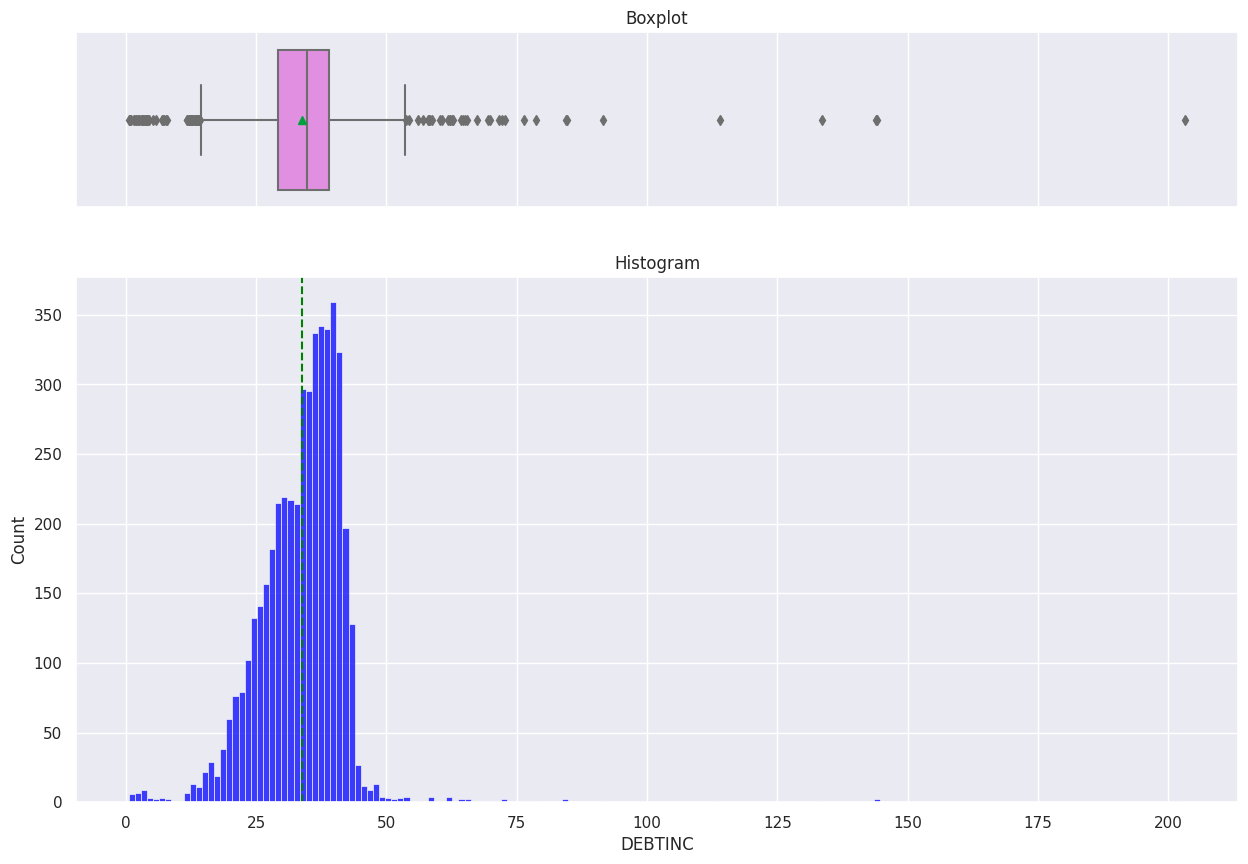

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['DEBTINC'])

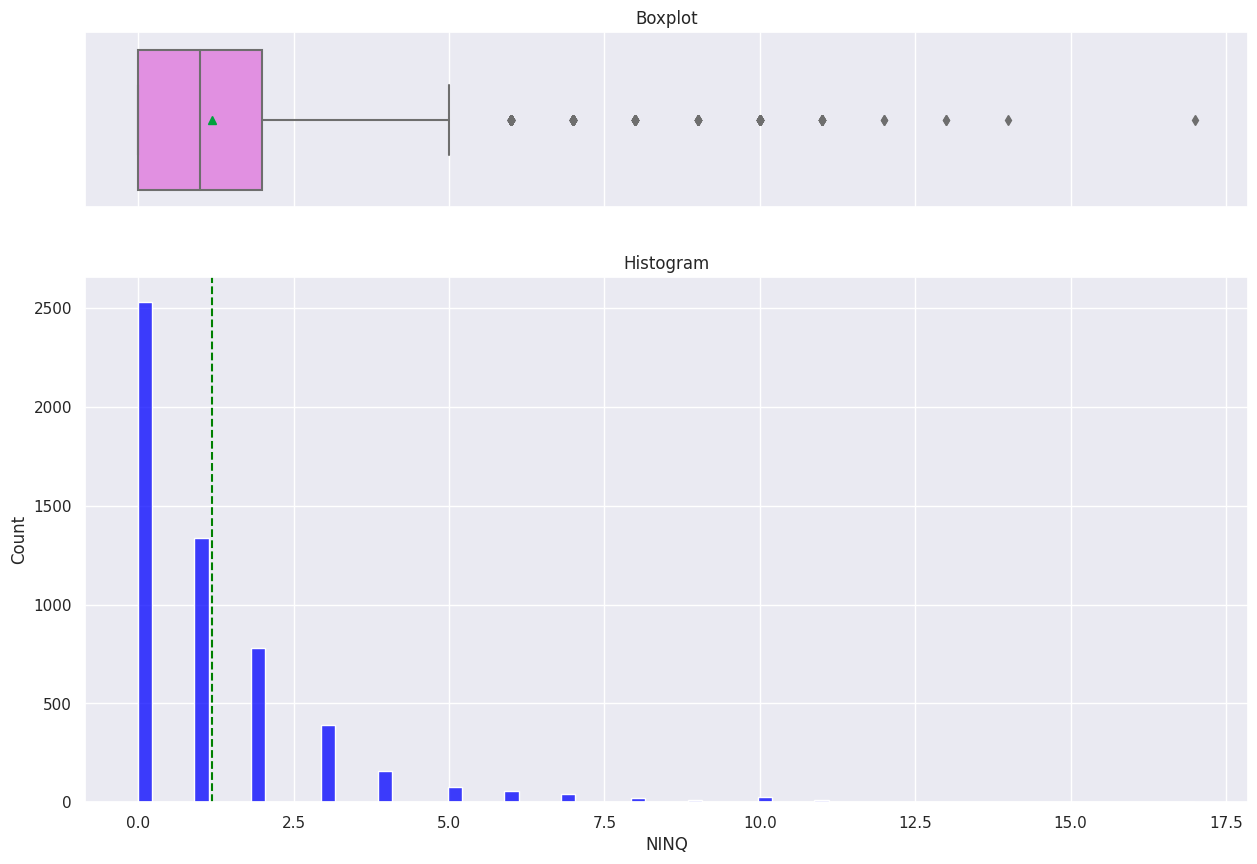

In [ ]:
# Build the histogram boxplot for NINQ
histogram_boxplot(data['NINQ'])

**Insights**

The **VALUE** and **MORTDUE** features exhibit slight right skewness, indicating a concentration of lower values with a long tail on the higher end.

The majority of customers have **no derogatory reports (DEROG)** or **delinquent credit lines (DELINQ)**, which aligns with expected borrower behavior.

The **debt-to-income ratio (DEBTINC)** is generally well-distributed, with most values falling within the **25 to 40** range. However, there are a few noticeable outliers that may warrant further investigation.

For **recent credit inquiries (NINQ)**, most customers have made **two or fewer inquiries**, though higher values are present.

The **age of the oldest credit line (CLAGE)** appears to be **nearly uniformly distributed**, indicating a wide spread across the customer base.


### 2. Univariate Analysis - Categorical Data

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar1(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

import matplotlib.pyplot as plt

def perc_on_bar(ax, feature):
    '''
    Annotates a seaborn or matplotlib bar plot with the percentage of each category.

    Parameters:
    - ax: matplotlib axes object
    - feature: Array-like, the categorical data from which the plot was generated

    Notes:
    - This function is designed for simple bar plots (single categorical variable).
    - It does not support plots with a 'hue' parameter used.
    '''
    total = len(feature) # Total number of data points
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Calculate percentage
        x = p.get_x() + p.get_width() / 2 - 0.05 # Adjust x position
        y = p.get_y() + p.get_height() # Adjust y position
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percentage



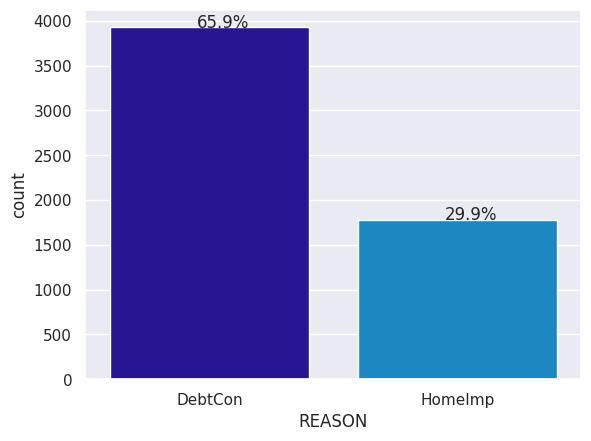

In [ ]:
#Build barplot for REASON
# Create a bar plot
fig, ax = plt.subplots()
sns.countplot(x='REASON', data=data, ax=ax)
# show percent
perc_on_bar(ax, data['REASON'])


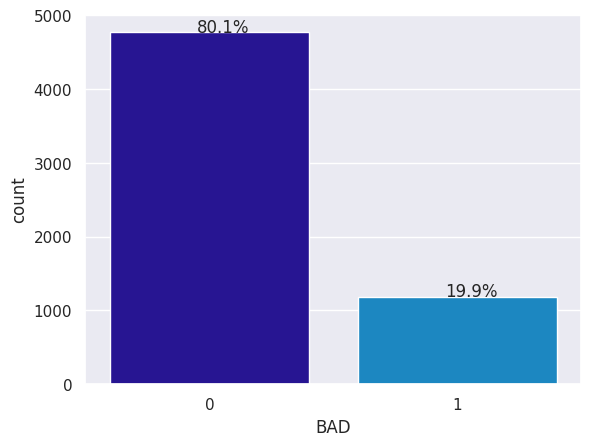

In [ ]:
#Build barplot for BAD
fig, ax = plt.subplots()
sns.countplot(x='BAD', data=data, ax=ax)
# show percent
perc_on_bar(ax, data['BAD'])

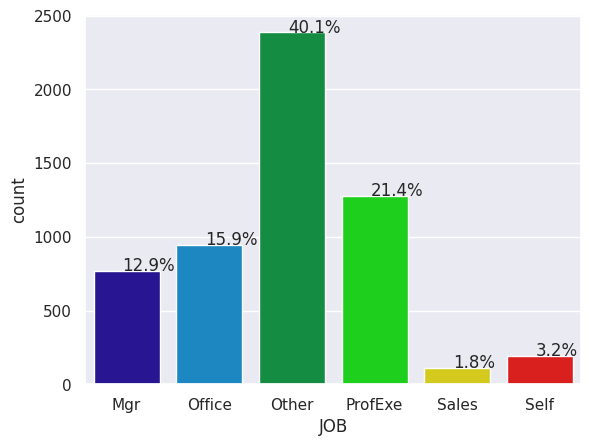

In [ ]:
#Build barplot for JOB
fig, ax = plt.subplots()
sns.countplot(x='JOB', data=data, ax=ax)
# show percent
perc_on_bar(ax, data['JOB'])

## Bivariate Analysis


### Bivariate Analysis: Continuous and Categorical Variables


**Analyze BAD vs Loan**

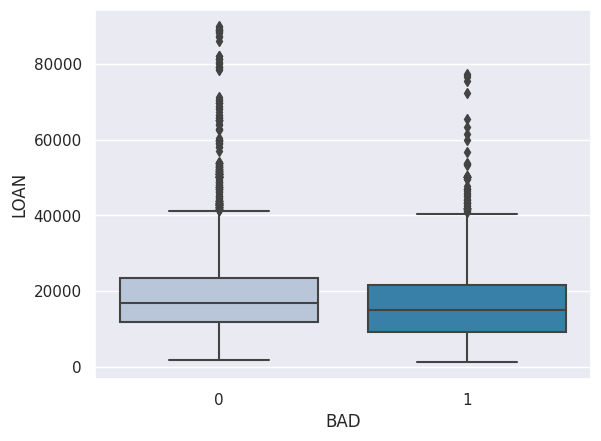

In [ ]:
sns.boxplot(x=data["BAD"], y=data['LOAN'], palette="PuBu")
plt.show()

**Insights**

* Loan amount does not seem to add too much to target variable BAD

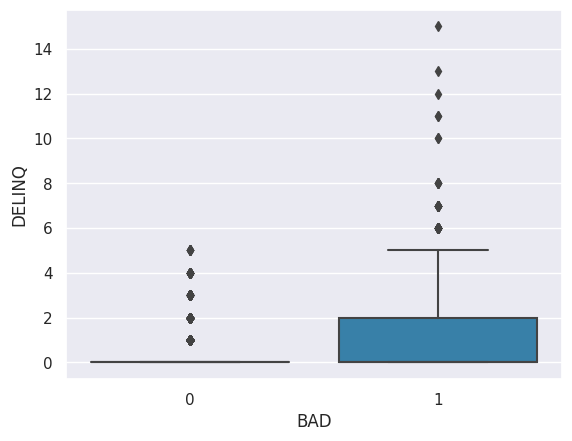

In [ ]:
sns.boxplot(x=data["BAD"], y=data['DELINQ'], palette="PuBu")
plt.show()

**Insights**

* Most of customers who pay back loan have no delinquent credit lines and that makes sense.
* Customers with delinquent credit lines tend to default on loan far more often

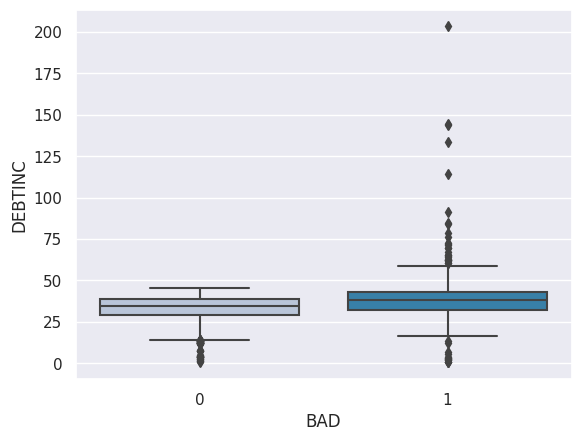

In [ ]:
sns.boxplot(x=data["BAD"], y=data['DEBTINC'], palette="PuBu")
plt.show()

**Insights**

* Customers with high Debt to income ratio have much higher chance of defaulting on loan
* Anything above 50 seems to result into loan default (BAD)

### Bivariate Analysis: Two Continuous Variables

<Axes: xlabel='VALUE', ylabel='MORTDUE'>

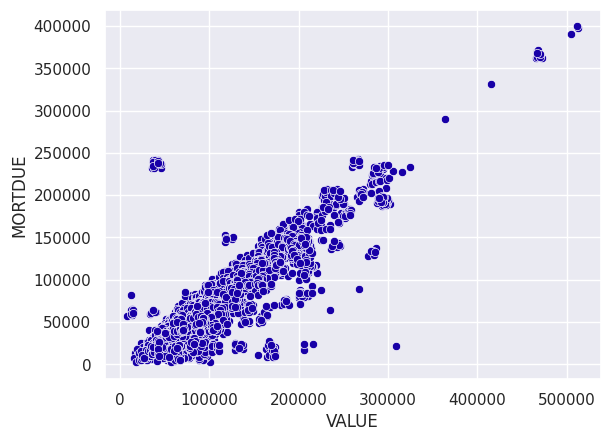

In [ ]:
sns.scatterplot(x=data["VALUE"],y=data['MORTDUE'],palette="PuBu")

**Insights:**

VALUE and MORTDUE seem to be highly correlated as expected

### Bivariate Analysis: BAD vs Categorical Variables

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


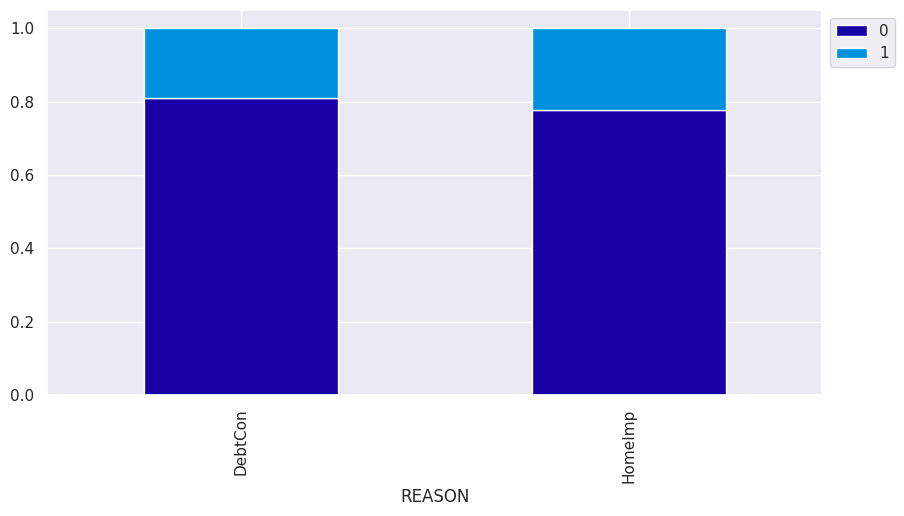

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**

From above plot it seems that reason for Loan has no effect on whether loan would go BAD or not

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


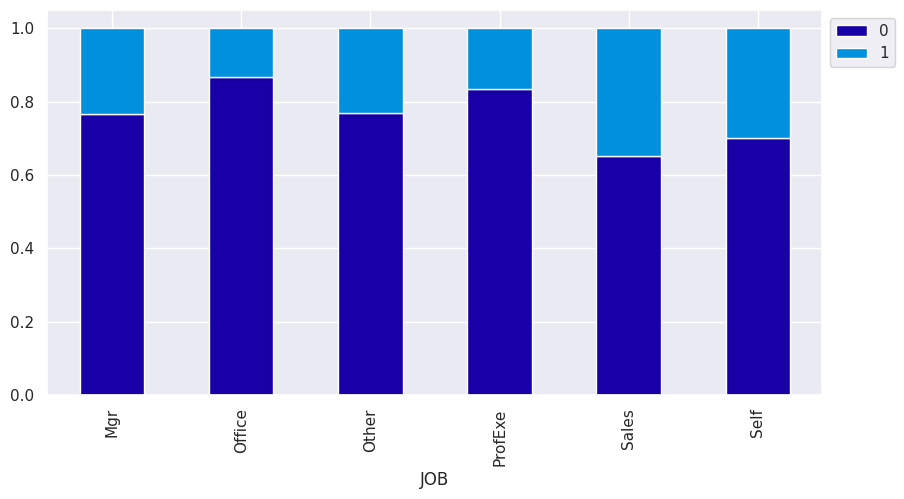

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['JOB'])

**Insights**

From the plot above, it appears that customers who are **self-employed** or working in **Sales** have a higher likelihood of defaulting on their loans. This may be attributed to the **greater income variability** often associated with these types of jobs. However, it's important to interpret this cautiously, as these job categories represent a **smaller portion of the dataset**, and the limited sample size may affect the reliability of this observation.

On the other hand, individuals in **Professional/Executive (ProfExe)** and **Office** roles show the **lowest default rates**, with BAD loan ratios **below the overall dataset average**. Customers classified under **Managerial (Mgr)** and **Other** roles also perform relatively well, with default rates not far behind.


## Multivariate Analysis
Analyze Correlation Heatmap for Numerical Variables

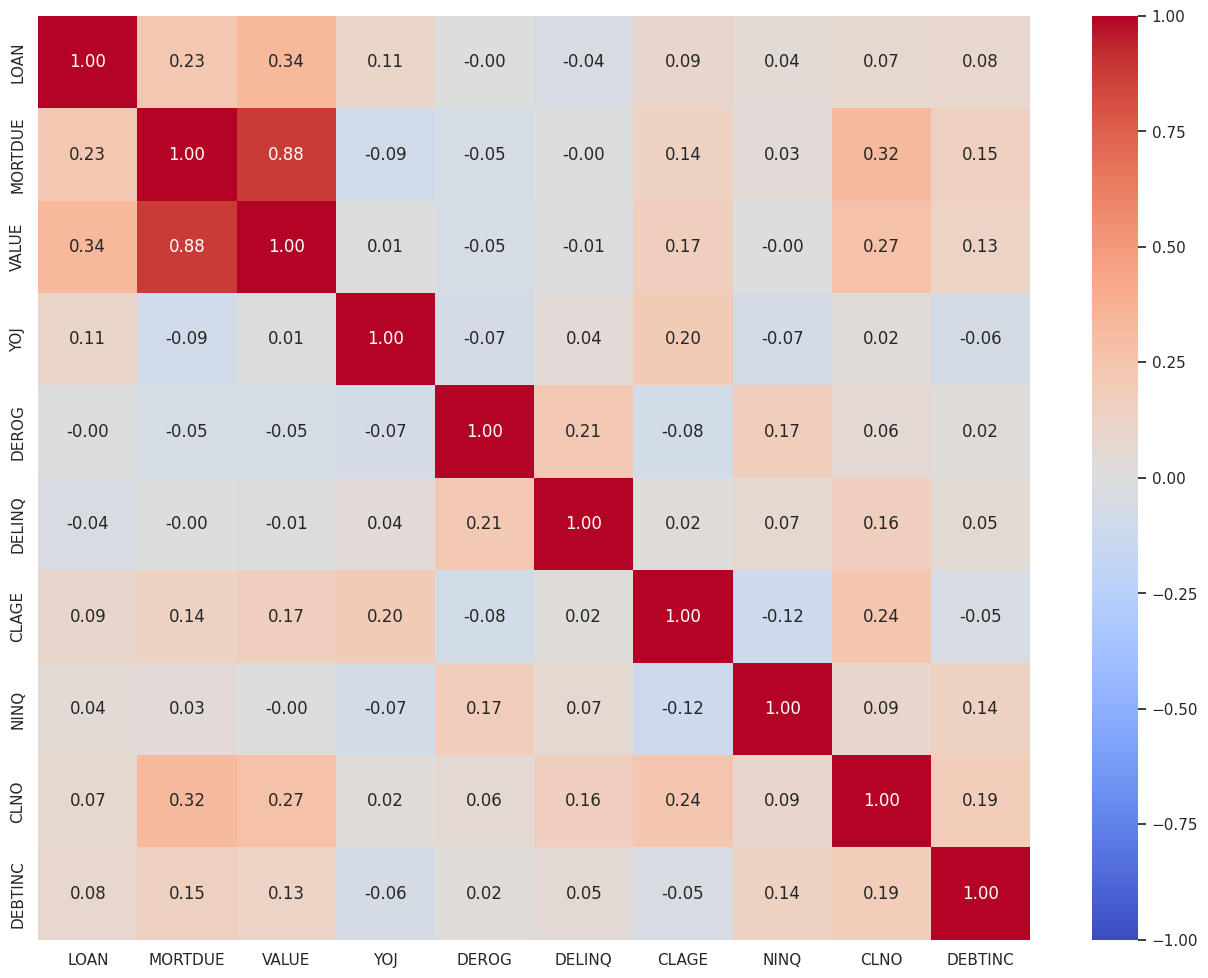

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
# Remove ___________ and complete the code

corr = data[numerical_col].corr()

# plot the heatmap
# Remove ___________ and complete the code

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,annot=True,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);


**Insights**

Only two variables seem to be highly correlated - VALUE and MORTDUE. This is expected as there would be higher amount of Mortgage for properties with higher value

## Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''

    Q1=df[col].quantile(q=0.25) # 25th quantile
    Q3=df[col].quantile(q=0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - (1.5 * IQR)  #define lower whisker
    Upper_Whisker = Q3 + (1.5 * IQR)  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)

    return df

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

**Adding new columns in the dataset for each column which has missing values**

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

**Filling missing values in numerical columns with median and mode in categorical variables**

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# data[num_data.columns]
num_data.columns

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(num_data.mean())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    df[column] = data[column].fillna(data[column].mode()[0])

In [ ]:
df[num_data.columns]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...
5955,88900,57264.0000,90185.000000,16.000000,0.00000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,89000,54576.0000,92937.000000,16.000000,0.00000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,89200,54045.0000,92924.000000,15.000000,0.00000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,89800,50370.0000,91861.000000,14.000000,0.00000,0.000000,213.892709,0.000000,16.000000,34.340882


In [ ]:
df[cat_data]

,BAD,REASON,JOB
0,1,HomeImp,Other
1,1,HomeImp,Other
2,1,HomeImp,Other
3,1,DebtCon,Other
4,0,HomeImp,Office
...,...,...,...
5955,0,DebtCon,Other
5956,0,DebtCon,Other
5957,0,DebtCon,Other
5958,0,DebtCon,Other


# Models



### Model Building – Approach

1. **Data Preparation**

   * Clean and preprocess the dataset
   * Handle missing values and outliers
   * Encode categorical variables and scale numerical features as needed

2. **Train-Test Split**

   * Split the data into **training** and **test** sets to evaluate model performance on unseen data

3. **Model Training**

   * Fit the chosen model(s) using the training data

4. **Model Tuning**

   * Optimize hyperparameters through techniques such as cross-validation or grid/randomized search

5. **Model Evaluation**

   * Assess model performance on the test set using appropriate evaluation metrics





In [ ]:
data = df.copy()

**Separating the target variable from other variables**

In [ ]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data.drop(['BAD'],axis = 1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first=False)

# Create y(dependent varibale)

y = data.BAD
X.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,...,False,True,False,True,False,False,True,False,False,False
1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,...,False,True,False,True,False,False,True,False,False,False
2,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,...,False,True,False,True,False,False,True,False,False,False
3,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,...,True,True,True,False,False,False,True,False,False,False
4,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,...,False,True,False,True,False,True,False,False,False,False


**Splitting the data into 70% train and 30% test set**

In [ ]:
# Split the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30,stratify=y, random_state=1)

In [ ]:
# Scale Data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

# following is needed to do cross validate for models using scaled data
X_scaled=pd.DataFrame(scaler.transform(X), columns=X.columns)

## Model Evaluation Criterion



As mentioned earlier, **accuracy alone—particularly for the positive class (BAD loans)**—is not a sufficient metric for evaluating model performance. A model that aggressively identifies BAD loans may achieve high accuracy on that class, but if it incorrectly rejects too many GOOD loans, it could result in significant lost revenue. Therefore, we need to strike a careful **balance between minimizing risk and preserving opportunity**.

Ideally, this balance should be guided by **business input**—specifically, understanding the trade-off between the **average profit from GOOD loans** and the **average loss from BAD loans**. This cost-benefit perspective can help define acceptable thresholds and influence model selection and tuning.


In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not BAD', 'BAD'], yticklabels=['Not BAD', 'BAD'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
def cross_validate_score(model,train_data,test_data):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model,train_data,test_data, scoring='recall', cv=cv, n_jobs=-1)
    # report performance
    print(scores)
    scores = pd.Series(scores)
    print(scores.min(), scores.mean(), scores.max())

In [ ]:
# Create prediction probability list
def predict_probability(model,train_data,test_data,threshold):
    Y_prob = model.predict_proba(train_data)[:, 1]

    # Create new predictions based on new probability threshold
    Y_new_pred = []

    for i in range(0, len(Y_prob)):
        if Y_prob[i] > threshold:
            Y_new_pred.append(1)
        else:
            Y_new_pred.append(0)

    # Check the effect of probability threshold on predictions
    print(metrics_score(test_data, Y_new_pred))

## Model Building

**Before getting to Deep Learning models, let us build a Logistic Regression Model ( No parameters at all)**

In [ ]:
lr_base = LogisticRegression(random_state=42)

# Fitting the model on the training data

lr_base = lr_base.fit(X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3340
           1       0.80      0.64      0.71       832

    accuracy                           0.90      4172
   macro avg       0.86      0.80      0.82      4172
weighted avg       0.89      0.90      0.89      4172



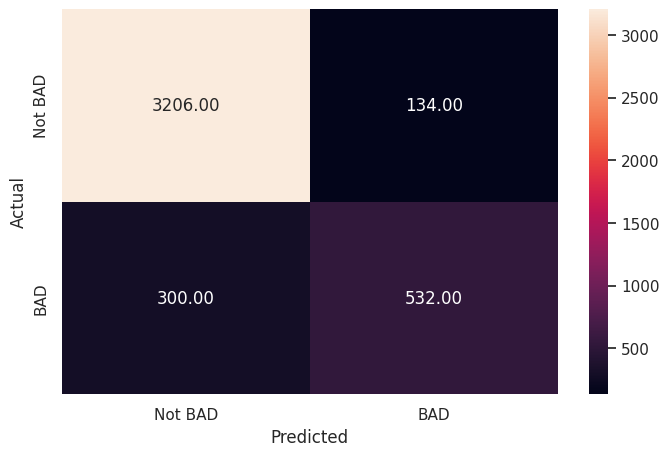

In [ ]:
#Predict for train set
y_pred_lr_train = lr_base.predict(X_train_scaled)

#checking the performance on the train dataset
metrics_score(y_train,y_pred_lr_train)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1431
           1       0.78      0.58      0.66       357

    accuracy                           0.88      1788
   macro avg       0.84      0.77      0.80      1788
weighted avg       0.88      0.88      0.88      1788



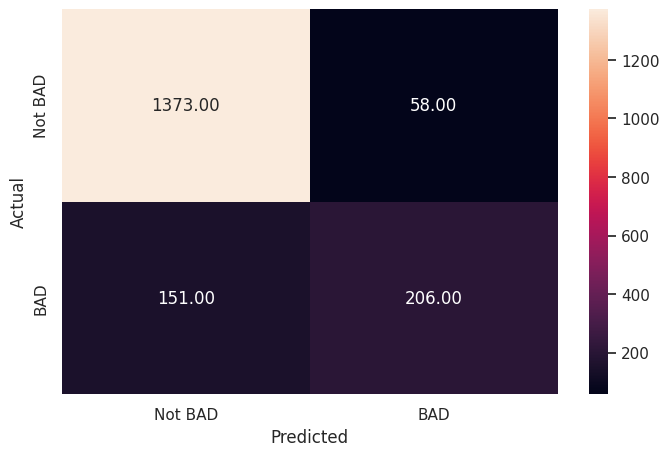

In [ ]:
#Predict for test set

y_pred_lr_test = lr_base.predict(X_test_scaled)

#checking the performance on the test dataset

metrics_score(y_test,y_pred_lr_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

In [ ]:
data['REASON'] = data['REASON'].map({'HomeImp': 0, 'DebtCon': 1})
data = pd.get_dummies(data, columns=['JOB'])

In [ ]:
X.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,...,False,True,False,True,False,False,True,False,False,False
1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,...,False,True,False,True,False,False,True,False,False,False
2,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,...,False,True,False,True,False,False,True,False,False,False
3,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,...,True,True,True,False,False,False,True,False,False,False
4,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,...,False,True,False,True,False,True,False,False,False,False


In [ ]:

# Split the data into features and target
X = data.drop('BAD', axis=1)
y = data['BAD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Deep Learning Model Architecture



### Architecture Overview

**Input Layer:**
The model begins with an input layer sized to match the number of features in the dataset (`X_train.shape[1]`), ensuring all input variables for loan prediction are accounted for.

**Hidden Layers:**

* The first hidden layer contains **64 neurons** (configurable) with **ReLU** activation, introducing non-linearity while addressing the vanishing gradient problem common in deep networks.
* A **dropout layer** with a **rate of 0.2** follows to reduce overfitting by randomly disabling a fraction of neurons during training.
* The second hidden layer reduces complexity with **32 neurons**, also using ReLU, followed by another **dropout layer (rate = 0.2)** to further promote generalization.
* Optionally, if `additional_layer=True`, a third hidden layer with **16 neurons** and another dropout layer is added, enabling the model to capture more complex patterns when needed.

**Output Layer:**
A **single neuron** with a **sigmoid activation** function serves as the output layer. The sigmoid squashes values between 0 and 1, providing a probabilistic output suited for binary classification—indicating the likelihood of a loan default.

**Model Compilation:**

* **Optimizer:** Adam, chosen for its efficiency and adaptive learning capabilities, with a learning rate of **0.001**
* **Loss Function:** Binary crossentropy, appropriate for binary classification
* **Evaluation Metrics:**

  * **Accuracy** – Measures overall correctness
  * **Recall** – Prioritized to capture as many BAD loans as possible, which is crucial for minimizing financial risk in lending decisions

In [ ]:
def create_base_model(neurons=64,activation='relu',learning_rate=0.001, additional_layer=False, drop_rate=0.2):
  # Create the model
  model = Sequential()
  model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
  model.add(Dropout(drop_rate))
  model.add(Dense(neurons/2, activation=activation))
  model.add(Dropout(drop_rate))
  if additional_layer:
    model.add(Dense(neurons/4, activation=activation))
    model.add(Dropout(drop_rate))

  model.add(Dense(1, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy',Recall(name='recall')])
  return model


In [ ]:
import pandas as pd

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model','Train_Test', 'Bad_Loans_Captured','Bad_Loans_Missed', 'Good_Loans_Captured','Good_Loans_Missed','Bad_Loans_Captured_Pct','Good_Loans_Captured_Pct'])
results_df = pd.DataFrame(columns=['Model', 'Bad_Loans_Captured','Bad_Loans_Missed', 'Good_Loans_Captured','Good_Loans_Missed','Bad_Loans_Captured_Pct','Good_Loans_Captured_Pct','Train_Test_Drop_Good','Train_Test_Drop_Bad'])


In [ ]:
results_df_2 = pd.DataFrame(columns=['Model', 'Bad_Loans_Captured','Bad_Loans_Missed', 'Good_Loans_Captured','Good_Loans_Missed','Bad_Loans_Captured_Pct','Good_Loans_Captured_Pct','Train_Test_Drop_Good','Train_Test_Drop_Bad'])
def update_results_2(model_name,train, train_predicted, test, test_predicted):
    global results_df_2
    from sklearn.metrics import confusion_matrix

    # Calculate confusion matrix
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(train, train_predicted).ravel()
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(test, test_predicted).ravel()

    # Calculate recalls
    train_recall_bad_loans = train_tp / (train_tp + train_fn)
    train_recall_good_loans = train_tn / (train_tn + train_fp)

    test_recall_bad_loans = test_tp / (test_tp + test_fn)
    test_recall_good_loans = test_tn / (test_tn + test_fp)

    # Append the results to the DataFrame
    new_data = pd.DataFrame({
        'Model': [model_name],
        'Bad_Loans_Captured': [test_tp],
        'Bad_Loans_Missed': [test_fn],
        'Good_Loans_Captured': [test_tn],
        'Good_Loans_Missed': [test_fp],
        'Bad_Loans_Captured_Pct': [test_recall_bad_loans],
        'Good_Loans_Captured_Pct': [test_recall_good_loans],
        'Train_Test_Drop_Good': [train_recall_good_loans - test_recall_good_loans],
        'Train_Test_Drop_Bad': [train_recall_bad_loans - test_recall_bad_loans]
    })

    # Use concat to append the new row
    results_df_2 = pd.concat([results_df_2, new_data], ignore_index=True)
    return results_df_2

In [ ]:
def update_results(model_name,train, train_predicted, test, test_predicted):
    global results_df
    from sklearn.metrics import confusion_matrix

    # Calculate confusion matrix
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(train, train_predicted).ravel()
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(test, test_predicted).ravel()

    # Calculate recalls
    train_recall_bad_loans = train_tp / (train_tp + train_fn)
    train_recall_good_loans = train_tn / (train_tn + train_fp)

    test_recall_bad_loans = test_tp / (test_tp + test_fn)
    test_recall_good_loans = test_tn / (test_tn + test_fp)

    # Append the results to the DataFrame
    new_data = pd.DataFrame({
        'Model': [model_name],
        'Bad_Loans_Captured': [test_tp],
        'Bad_Loans_Missed': [test_fn],
        'Good_Loans_Captured': [test_tn],
        'Good_Loans_Missed': [test_fp],
        'Bad_Loans_Captured_Pct': [test_recall_bad_loans],
        'Good_Loans_Captured_Pct': [test_recall_good_loans],
        'Train_Test_Drop_Good': [train_recall_good_loans - test_recall_good_loans],
        'Train_Test_Drop_Bad': [train_recall_bad_loans - test_recall_bad_loans]
    })

    # Use concat to append the new row
    results_df = pd.concat([results_df, new_data], ignore_index=True)
    return results_df

In [ ]:
import matplotlib.pyplot as plt

def plot_hist(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['recall'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

## Model#1

Let us start with deep learning model

In [ ]:
model1=create_base_model()
history1=model1.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
149/149 [==============================] - 2s 3ms/step - loss: 0.4414 - accuracy: 0.8152 - recall: 0.3788
Epoch 2/50
149/149 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.8826 - recall: 0.5823
Epoch 3/50
149/149 [==============================] - 0s 3ms/step - loss: 0.2919 - accuracy: 0.8861 - recall: 0.6071
Epoch 4/50
149/149 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.8935 - recall: 0.6353
Epoch 5/50
149/149 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.8962 - recall: 0.6353
Epoch 6/50
149/149 [==============================] - 0s 3ms/step - loss: 0.2606 - accuracy: 0.9012 - recall: 0.6591
Epoch 7/50
149/149 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.8970 - recall: 0.6407
Epoch 8/50
149/149 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.9050 - recall: 0.6721
Epoch 9/50
149/149 [==============================] - 0s 2ms/ste

149/149 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3844
           1       0.93      0.83      0.88       924

    accuracy                           0.96      4768
   macro avg       0.95      0.91      0.93      4768
weighted avg       0.95      0.96      0.95      4768



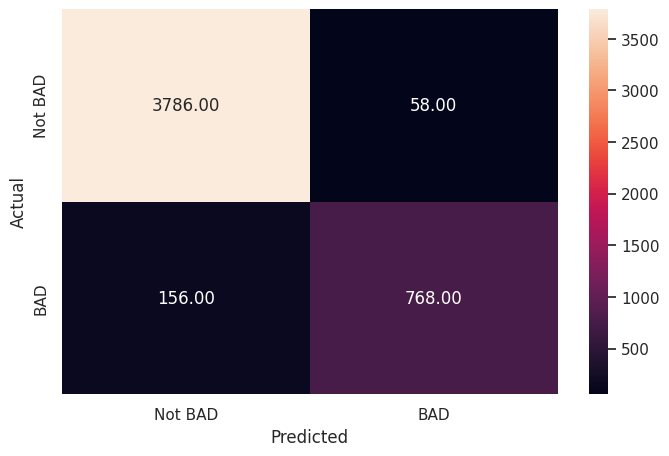

In [ ]:
y_pred_train = (model1.predict(X_train) > 0.5).astype(int)
metrics_score(y_train,y_pred_train)

38/38 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       927
           1       0.88      0.74      0.80       265

    accuracy                           0.92      1192
   macro avg       0.90      0.86      0.88      1192
weighted avg       0.92      0.92      0.92      1192



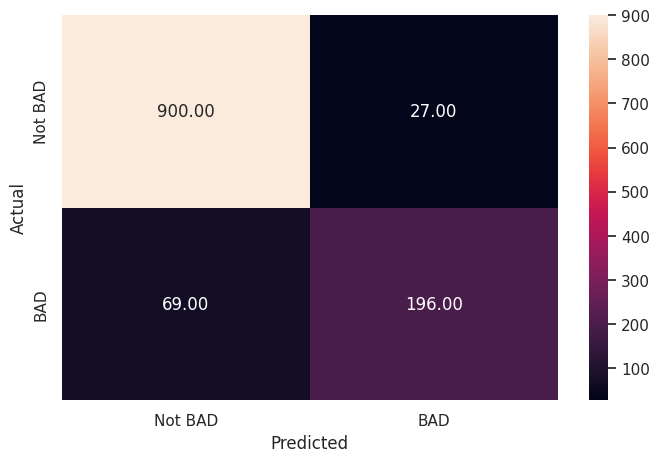

In [ ]:
y_pred = (model1.predict(X_test) > 0.5).astype(int)
metrics_score(y_test,y_pred)

In [ ]:
update_results('Model#1: Base Model',y_train, y_pred_train, y_test, y_pred)
#update_results('Model#1: Base Model','test', y_test, y_pred)

,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad
0,Model#1: Base Model,196,69,900,27,0.739623,0.970874,0.014038,0.091546


**Analysis:** Analyzing predictions of 1192 unseen loan data by model:

**Good Loans:** We classified 27 good loans as Bad, hence bank would miss income on these loans

**Bad Loans:** We captured 196 Bad loans and saved bank from loss on those loans. We failed to capture 69 Bad loans

Performance was comparable going from train to test data

**AS this is binary classification, we can try to see results of lowering the threshold (from default of 0.5):**

38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       927
           1       0.81      0.83      0.82       265

    accuracy                           0.92      1192
   macro avg       0.88      0.89      0.88      1192
weighted avg       0.92      0.92      0.92      1192



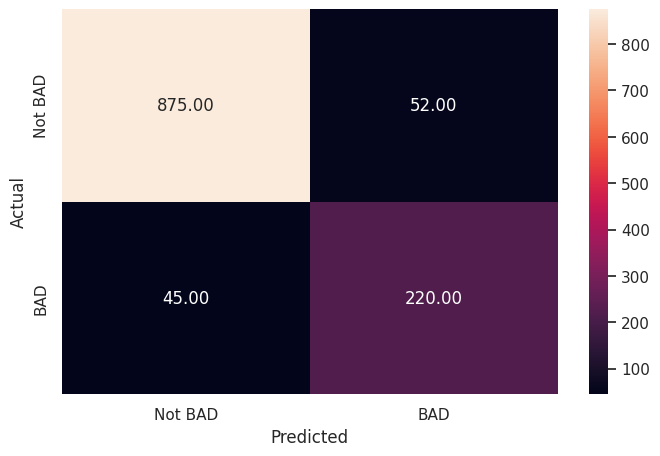

In [ ]:
y_pred = (model1.predict(X_test) > 0.3).astype(int)
metrics_score(y_test,y_pred)

## Model#2

Target higher for Recall on positive class

**Assuming that loss on Bad loan is higher than profit on good loan, we can change weights for both classes:**

In [ ]:
model2=create_base_model()
# Set class weights
class_weights = {0: 1.0, 1: 2.0}
history2=model2.fit(X_train, y_train, class_weight=class_weights,epochs=50, batch_size=32, verbose=1)


Epoch 1/50
149/149 [==============================] - 2s 4ms/step - loss: 0.5857 - accuracy: 0.8268 - recall: 0.5736
Epoch 2/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4451 - accuracy: 0.8767 - recall: 0.7045
Epoch 3/50
149/149 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8716 - recall: 0.7240
Epoch 4/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8842 - recall: 0.7489
Epoch 5/50
149/149 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8880 - recall: 0.7554
Epoch 6/50
149/149 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8916 - recall: 0.7662
Epoch 7/50
149/149 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8907 - recall: 0.7554
Epoch 8/50
149/149 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.8983 - recall: 0.7771
Epoch 9/50
149/149 [==============================] - 0s 3ms/ste

149/149 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3844
           1       0.87      0.88      0.88       924

    accuracy                           0.95      4768
   macro avg       0.92      0.93      0.92      4768
weighted avg       0.95      0.95      0.95      4768



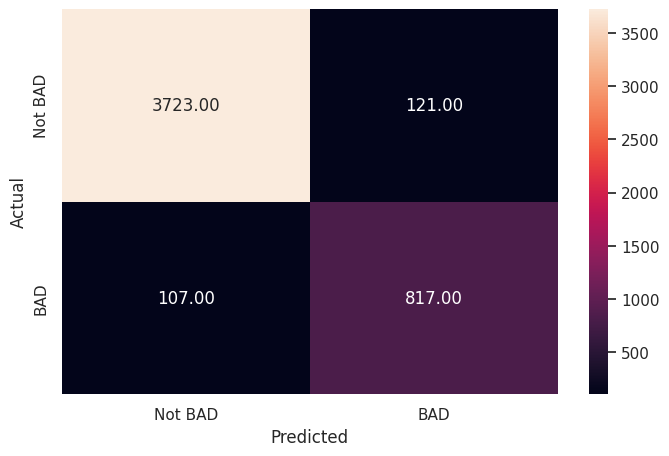

In [ ]:
y_pred_train = (model2.predict(X_train) > 0.5).astype(int)
metrics_score(y_train,y_pred_train)

38/38 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       927
           1       0.83      0.80      0.82       265

    accuracy                           0.92      1192
   macro avg       0.89      0.88      0.88      1192
weighted avg       0.92      0.92      0.92      1192



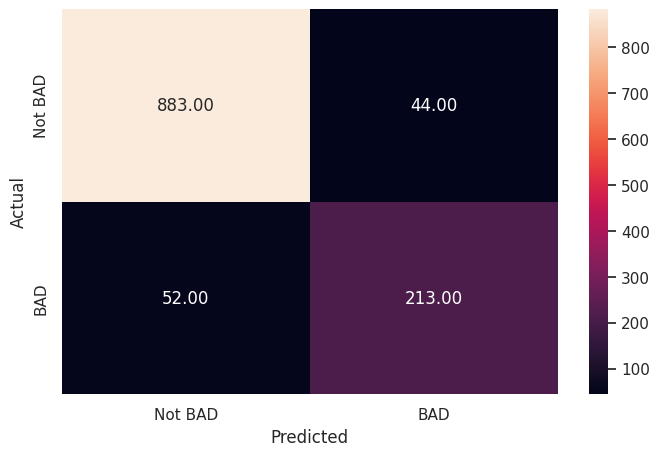

In [ ]:
y_pred = (model2.predict(X_test) > 0.5).astype(int)
metrics_score(y_test,y_pred)



### Analysis of Model Predictions on 1,192 Unseen Loan Records:

**Good Loans:**
The model incorrectly classified **44 good loans as bad**, meaning the bank would have missed out on potential income from these customers.

**Bad Loans:**
The model correctly identified **213 bad loans**, potentially saving the bank from significant financial losses. However, it **missed 52 bad loans**, which could still result in some risk exposure.

**Overall Assessment:**
Without adjusting the classification threshold, these results are quite promising. The model demonstrates a solid balance between risk mitigation and income preservation.


In [ ]:
update_results('Model#2: using Class Weights',y_train, y_pred_train, y_test, y_pred)

,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad
0,Model#1: Base Model,196,69,900,27,0.739623,0.970874,0.014038,0.091546
1,Model#2: using Class Weights,213,52,883,44,0.803774,0.952535,0.015987,0.080426


## Model#3



**Let us try to add some data to balance classes**

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model3=create_base_model()
# Train the model on the resampled data
model3.fit(X_train_resampled, y_train_resampled,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
241/241 [==============================] - 2s 3ms/step - loss: 0.4613 - accuracy: 0.7866 - recall: 0.7755
Epoch 2/50
241/241 [==============================] - 1s 3ms/step - loss: 0.3687 - accuracy: 0.8400 - recall: 0.8241
Epoch 3/50
241/241 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8544 - recall: 0.8429
Epoch 4/50
241/241 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8593 - recall: 0.8463
Epoch 5/50
241/241 [==============================] - 1s 4ms/step - loss: 0.3134 - accuracy: 0.8630 - recall: 0.8517
Epoch 6/50
241/241 [==============================] - 1s 4ms/step - loss: 0.3022 - accuracy: 0.8721 - recall: 0.8665
Epoch 7/50
241/241 [==============================] - 1s 4ms/step - loss: 0.2920 - accuracy: 0.8772 - recall: 0.8668
Epoch 8/50
241/241 [==============================] - 1s 3ms/step - loss: 0.2838 - accuracy: 0.8781 - recall: 0.8741
Epoch 9/50
241/241 [==============================] - 1s 3ms/ste

149/149 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3844
           1       0.82      0.98      0.89       924

    accuracy                           0.95      4768
   macro avg       0.91      0.96      0.93      4768
weighted avg       0.96      0.95      0.95      4768



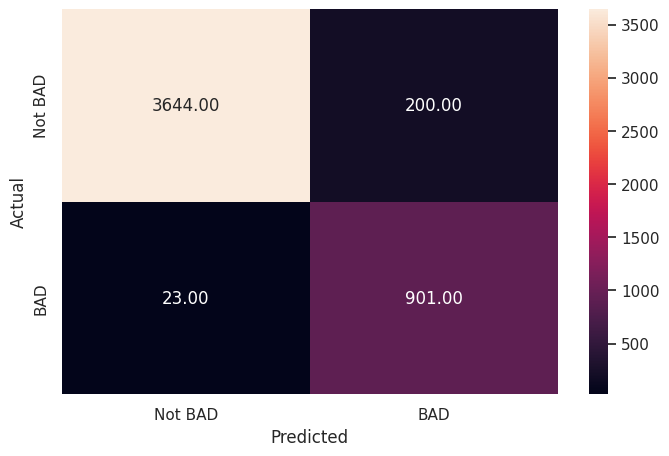

In [ ]:
y_pred_train = (model3.predict(X_train) > 0.5).astype(int)
metrics_score(y_train,y_pred_train)

38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       927
           1       0.75      0.87      0.81       265

    accuracy                           0.91      1192
   macro avg       0.86      0.89      0.87      1192
weighted avg       0.91      0.91      0.91      1192



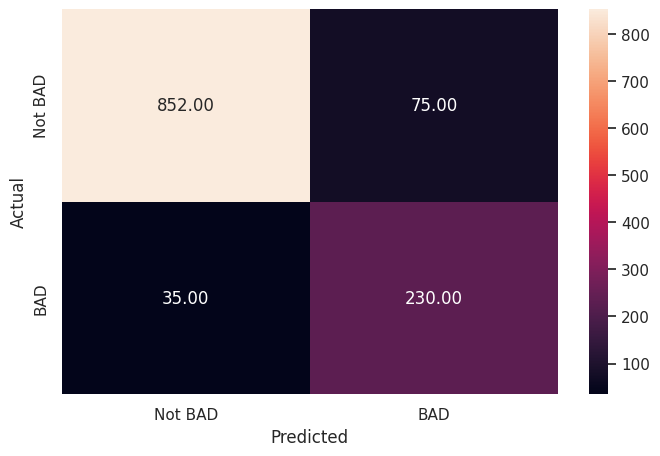

In [ ]:
y_pred = (model3.predict(X_test) > 0.5).astype(int)
metrics_score(y_test,y_pred)



### Analysis of Model Predictions on 1,192 Unseen Loan Records:

**Good Loans:**
The model incorrectly flagged **75 good loans as bad**, leading to potential missed revenue for the bank.

**Bad Loans:**
It correctly identified **221 bad loans**, helping the bank avoid losses on those accounts. However, **35 bad loans were not detected**, representing a remaining area of risk.

**Overall Assessment:**
The model is **successfully capturing a high number of bad loans**, which is valuable for risk mitigation. However, this comes at the **cost of incorrectly rejecting more good loans**, which could impact potential earnings. This trade-off may be acceptable depending on the bank's risk appetite and profit-loss ratio, but it could be fine-tuned further with threshold adjustments or cost-sensitive modeling.

In [ ]:
update_results('Model#3: using SMOTE',y_train, y_pred_train, y_test, y_pred)

,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad
0,Model#1: Base Model,196,69,900,27,0.739623,0.970874,0.014038,0.091546
1,Model#2: using Class Weights,213,52,883,44,0.803774,0.952535,0.015987,0.080426
2,Model#3: using SMOTE,230,35,852,75,0.867925,0.919094,0.028877,0.107184


## Model#4


### Building a More Complex Model to Improve Recall on Bad Loans

To further improve **recall on the positive class (Bad loans)**, we’ll experiment with a more complex model architecture:

* **Add an additional hidden layer** to enhance the model's capacity to learn complex patterns
* **Increase the number of neurons** in the first hidden layer for greater representational power
* **Adjust the learning rate** to optimize training dynamics and convergence

Initially, we'll test this enhanced model on the **original dataset (without SMOTE)** to evaluate its impact before introducing any class balancing techniques.

In [ ]:
model4=create_base_model(neurons=128,activation='relu',learning_rate=0.0005, additional_layer=True)
class_weights = {0: 1.0, 1: 2.0}
history4=model4.fit(X_train, y_train, class_weight=class_weights,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
149/149 [==============================] - 2s 3ms/step - loss: 0.6545 - accuracy: 0.8041 - recall: 0.4188
Epoch 2/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.8719 - recall: 0.6937
Epoch 3/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.8773 - recall: 0.7262
Epoch 4/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8849 - recall: 0.7413
Epoch 5/50
149/149 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.8909 - recall: 0.7706
Epoch 6/50
149/149 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8926 - recall: 0.7511
Epoch 7/50
149/149 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8941 - recall: 0.7684
Epoch 8/50
149/149 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8956 - recall: 0.7727
Epoch 9/50
149/149 [==============================] - 0s 3ms/ste

149/149 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3844
           1       0.90      0.93      0.91       924

    accuracy                           0.97      4768
   macro avg       0.94      0.95      0.95      4768
weighted avg       0.97      0.97      0.97      4768



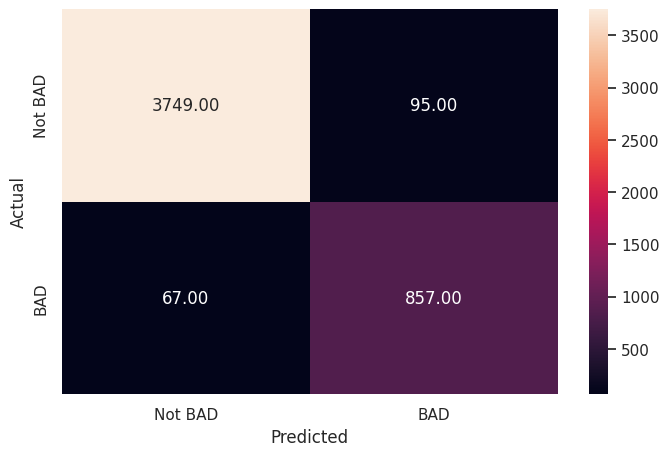

In [ ]:
y_pred_train = (model4.predict(X_train) > 0.5).astype(int)
metrics_score(y_train,y_pred_train)

38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       927
           1       0.84      0.82      0.83       265

    accuracy                           0.93      1192
   macro avg       0.89      0.89      0.89      1192
weighted avg       0.92      0.93      0.93      1192



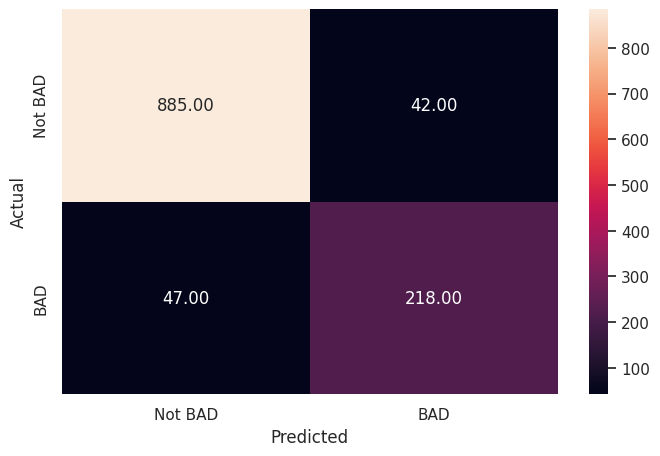

In [ ]:
y_pred = (model4.predict(X_test) > 0.5).astype(int)
metrics_score(y_test,y_pred)



### Analysis of Model Predictions on 1,192 Unseen Loan Records

**Good Loans:**
The model incorrectly classified **42 good loans as bad**, potentially resulting in missed revenue for the bank.

**Bad Loans:**
It correctly identified **218 bad loans**, helping prevent financial losses. However, **47 bad loans were not detected**, representing a moderate level of residual risk.

**Overall Assessment:**
These results demonstrate a strong balance between **risk mitigation and revenue retention**. The model captures a significant portion of bad loans while minimizing the rejection of good ones. These performance metrics are likely to be **acceptable from a business standpoint**, especially considering the trade-offs in credit decisioning.


In [ ]:
update_results('Model#4: Comlex Model 1',y_train, y_pred_train, y_test, y_pred)

,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad
0,Model#1: Base Model,196,69,900,27,0.739623,0.970874,0.014038,0.091546
1,Model#2: using Class Weights,213,52,883,44,0.803774,0.952535,0.015987,0.080426
2,Model#3: using SMOTE,230,35,852,75,0.867925,0.919094,0.028877,0.107184
3,Model#4: Comlex Model 1,218,47,885,42,0.822642,0.954693,0.020594,0.104848


## Model#5

Let us try model from #4 (with more layers etc) with resampled data


In [ ]:
model5=create_base_model(neurons=128,activation='relu',learning_rate=0.0005, additional_layer=True)
class_weights = {0: 1.0, 1: 2.0}
history5=model5.fit(X_train_resampled, y_train_resampled, class_weight=class_weights,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
241/241 [==============================] - 2s 3ms/step - loss: 0.6765 - accuracy: 0.7112 - recall: 0.8939
Epoch 2/50
241/241 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.8373 - recall: 0.9022
Epoch 3/50
241/241 [==============================] - 1s 4ms/step - loss: 0.4689 - accuracy: 0.8431 - recall: 0.9131
Epoch 4/50
241/241 [==============================] - 1s 5ms/step - loss: 0.4397 - accuracy: 0.8591 - recall: 0.9238
Epoch 5/50
241/241 [==============================] - 1s 5ms/step - loss: 0.4205 - accuracy: 0.8613 - recall: 0.9266
Epoch 6/50
241/241 [==============================] - 1s 3ms/step - loss: 0.4043 - accuracy: 0.8708 - recall: 0.9339
Epoch 7/50
241/241 [==============================] - 1s 3ms/step - loss: 0.3726 - accuracy: 0.8776 - recall: 0.9383
Epoch 8/50
241/241 [==============================] - 1s 3ms/step - loss: 0.3633 - accuracy: 0.8831 - recall: 0.9389
Epoch 9/50
241/241 [==============================] - 1s 3ms/ste

149/149 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3844
           1       0.86      1.00      0.93       924

    accuracy                           0.97      4768
   macro avg       0.93      0.98      0.95      4768
weighted avg       0.97      0.97      0.97      4768



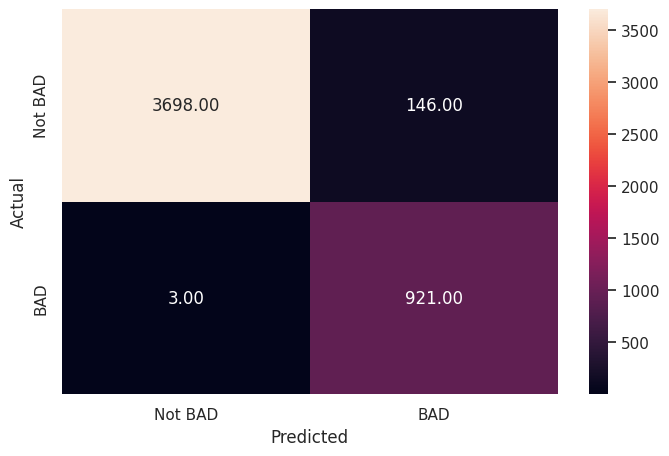

In [ ]:
y_pred_train = (model5.predict(X_train) > 0.5).astype(int)
metrics_score(y_train,y_pred_train)

38/38 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       927
           1       0.75      0.88      0.81       265

    accuracy                           0.91      1192
   macro avg       0.86      0.90      0.88      1192
weighted avg       0.92      0.91      0.91      1192



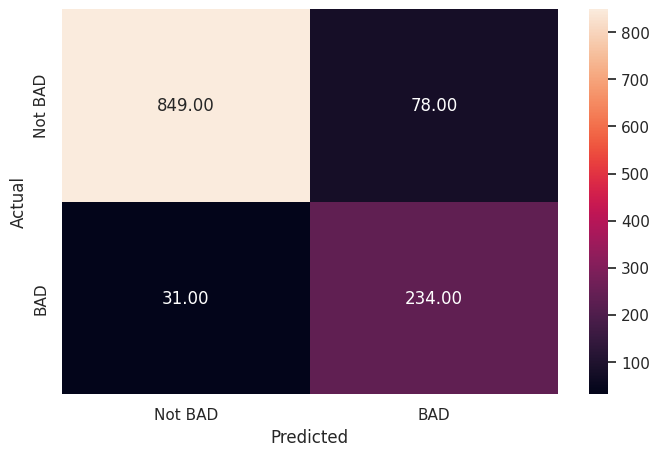

In [ ]:
y_pred = (model5.predict(X_test) > 0.5).astype(int)
metrics_score(y_test,y_pred)



### Analysis of Model Predictions on 1,192 Unseen Loan Records

**Good Loans:**
The model incorrectly flagged **78 good loans as bad**, which could result in lost income opportunities for the bank.

**Bad Loans:**
It successfully identified **234 bad loans**, helping the bank avoid potential losses. However, **31 bad loans were missed**, leaving some residual risk.

**Overall Assessment:**
The model demonstrates strong performance in identifying high-risk (bad) loans, with a relatively small trade-off in rejecting good loans. This outcome reflects a **favorable balance between risk reduction and revenue impact**, which may be well-aligned with business objectives depending on the bank’s tolerance for missed good loans.

In [ ]:
update_results('Model#5: Comlex Model & SMOTE',y_train, y_pred_train, y_test, y_pred)

,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad
0,Model#1: Base Model,196,69,900,27,0.739623,0.970874,0.014038,0.091546
1,Model#2: using Class Weights,213,52,883,44,0.803774,0.952535,0.015987,0.080426
2,Model#3: using SMOTE,230,35,852,75,0.867925,0.919094,0.028877,0.107184
3,Model#4: Comlex Model 1,218,47,885,42,0.822642,0.954693,0.020594,0.104848
4,Model#5: Comlex Model & SMOTE,234,31,849,78,0.883019,0.915858,0.046161,0.113734


**SMOTE and Class Weights:**

If we use both like in Model#5, we may be over compensating, we'll get higher Recall for Positive class but one for Negative class would go down. In this case, negative class is Good loans, so we have to be careful there.


## Multiple Models in Loop for Parameter/Hyperparameter Tuning



### Next Steps: Model Tuning

At this stage, after experimenting with five different models, we have a solid understanding of what architectures and strategies are effective. We can now focus on **fine-tuning** the model to further improve performance. Key areas to explore include:

* Varying the **number of neurons** in each layer
* Experimenting with different **numbers of hidden layers**
* Testing different **batch sizes** for training
* Adjusting **dropout rates** to control overfitting
* Evaluating performance **with and without early stopping**

These refinements will help us optimize the balance between recall, precision, and overall generalization.


In [ ]:
class_weights = {0: 1.0, 1: 2.0}
def run_model(model,model_name, epochs,batch_size, callbacks=None):
  if callbacks is None:
    model.fit(X_train, y_train, class_weight=class_weights, epochs=epochs, batch_size=batch_size, verbose=0)
  else:
    model.fit(X_train, y_train, class_weight=class_weights, epochs=epochs, batch_size=batch_size, verbose=0, callbacks=callbacks)

  y_pred_train = (model.predict(X_train) > 0.5).astype(int)
  y_pred = (model.predict(X_test) > 0.5).astype(int)
  update_results_2(model_name,y_train, y_pred_train, y_test, y_pred)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='recall', patience=10, restore_best_weights=True)

neurons_options = [64, 128]
additional_layer_options = [True, False]
batch_size_options = [16, 32, 64]
drop_rate_options = [0.2, 0.3]
callback_options = [None, early_stopping]

# Manual hyperparameter tuning
for neurons in neurons_options:
    for additional_layer in additional_layer_options:
        for batch_size in batch_size_options:
            for drop_rate in drop_rate_options:
              for callback in callback_options:
                # Create unique identifier number for each model
                cb = 'es' if callback is not None else 'no_es'
                model_num = f"{neurons}_{int(additional_layer)}_{batch_size}_{drop_rate}_{cb}"

                # Create the model with the current set of parameters
                model = create_base_model(neurons=neurons,
                                          activation='relu',
                                          learning_rate=0.0005,
                                          additional_layer=additional_layer,
                                          drop_rate=drop_rate)

                # Run the model with the specified parameters
                run_model(model, f'Model#{model_num}', epochs=100, batch_size=batch_size, callbacks=callback)

38/38 [==============================] - 0s 3ms/step


# Results


We began by experimenting with **five different deep learning models**, which provided solid baseline results and valuable insights into what configurations were effective. Building on that foundation, we used this understanding to **fine-tune various model parameters**, with the goal of optimizing approaches that had already shown promise.

All tuning results have been systematically recorded in a **DataFrame**, which we'll now review to analyze performance trends and identify the most effective configurations.

**First, let us look at full table:**

In [ ]:
results=results_df_2.copy()
results['Total_Missed_Loans'] = results['Good_Loans_Missed'] + results['Bad_Loans_Missed']
results = results.sort_values(by='Train_Test_Drop_Bad', ascending=True)
results

,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad,Total_Missed_Loans
29,Model#128_1_32_0.2_es,201,64,826,101,0.758491,0.891046,0.015561,-0.018231,165
37,Model#128_0_16_0.2_es,201,64,833,94,0.758491,0.898598,0.013473,-0.017149,158
1,Model#64_1_16_0.2_es,180,85,860,67,0.679245,0.927724,0.006199,-0.012579,152
3,Model#64_1_16_0.3_es,123,142,903,24,0.464151,0.974110,-0.005067,-0.009605,166
41,Model#128_0_32_0.2_es,177,88,864,63,0.667925,0.932039,0.003965,-0.003422,151
27,Model#128_1_16_0.3_es,194,71,832,95,0.732075,0.897519,0.015592,0.000609,166
7,Model#64_1_32_0.3_es,124,141,902,25,0.467925,0.973031,-0.005029,0.002855,166
19,Model#64_0_32_0.3_es,162,103,865,62,0.611321,0.933118,0.006789,0.005562,165
11,Model#64_1_64_0.3_es,81,184,914,13,0.305660,0.985976,-0.005227,0.008192,197
17,Model#64_0_32_0.2_es,162,103,871,56,0.611321,0.939590,0.000837,0.009891,159


**Early stopping is missing higher number of loans. Let us filter that out.**

**Sort by least drop from Training to Test data**

In [ ]:
results=results_df_2.copy()
results['Total_Missed_Loans'] = results['Good_Loans_Missed'] + results['Bad_Loans_Missed']
results = results[results['Model'].str.contains('no_es')]
results = results.sort_values(by='Train_Test_Drop_Bad', ascending=True)
results


,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad,Total_Missed_Loans
10,Model#64_1_64_0.3_no_es,213,52,874,53,0.803774,0.942826,0.015550,0.067439,105
22,Model#64_0_64_0.3_no_es,207,58,877,50,0.781132,0.946063,0.011534,0.072764,108
46,Model#128_0_64_0.3_no_es,220,45,880,47,0.830189,0.949299,0.021045,0.077820,92
20,Model#64_0_64_0.2_no_es,213,52,880,47,0.803774,0.949299,0.012460,0.081508,99
16,Model#64_0_32_0.2_no_es,215,50,877,50,0.811321,0.946063,0.021159,0.081536,100
14,Model#64_0_16_0.3_no_es,216,49,879,48,0.815094,0.948220,0.011197,0.083174,97
18,Model#64_0_32_0.3_no_es,202,63,886,41,0.762264,0.955771,0.014052,0.091632,104
2,Model#64_1_16_0.3_no_es,218,47,875,52,0.822642,0.943905,0.016553,0.092943,99
42,Model#128_0_32_0.3_no_es,217,48,890,37,0.818868,0.960086,0.020143,0.096716,85
6,Model#64_1_32_0.3_no_es,205,60,883,44,0.773585,0.952535,0.012605,0.099792,104


**Sort by Total number of missed loans (without regard to good or bad)**

In [ ]:
results=results_df_2.copy()
results['Total_Missed_Loans'] = results['Good_Loans_Missed'] + results['Bad_Loans_Missed']
results = results[results['Model'].str.contains('no_es')]
results = results.sort_values(by='Total_Missed_Loans', ascending=True)
results


,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad,Total_Missed_Loans
32,Model#128_1_64_0.2_no_es,221,44,890,37,0.833962,0.960086,0.019622,0.125994,81
24,Model#128_1_16_0.2_no_es,228,37,882,45,0.860377,0.951456,0.035016,0.129882,82
36,Model#128_0_16_0.2_no_es,215,50,893,34,0.811321,0.963323,0.026272,0.165952,84
42,Model#128_0_32_0.3_no_es,217,48,890,37,0.818868,0.960086,0.020143,0.096716,85
30,Model#128_1_32_0.3_no_es,224,41,883,44,0.845283,0.952535,0.021190,0.114674,85
40,Model#128_0_32_0.2_no_es,217,48,889,38,0.818868,0.959008,0.024083,0.127020,86
26,Model#128_1_16_0.3_no_es,213,52,892,35,0.803774,0.962244,0.024229,0.158348,87
38,Model#128_0_16_0.3_no_es,222,43,880,47,0.837736,0.949299,0.029890,0.109234,90
46,Model#128_0_64_0.3_no_es,220,45,880,47,0.830189,0.949299,0.021045,0.077820,92
34,Model#128_1_64_0.3_no_es,210,55,889,38,0.792453,0.959008,0.019140,0.127461,93


# Analysis


### Final Observations

This was not an inherently difficult problem for deep learning models. If our sole objective had been to optimize **accuracy** or **recall for a single class**, the task would have been much more straightforward. However, the real challenge lay in **balancing recall for both classes**—identifying as many **bad loans** as possible without rejecting too many **good loans**. Achieving this balance required more thoughtful tuning.

We experimented with various model configurations and hyperparameters, as summarized in the earlier results. A few key takeaways:

* **Early stopping** helped reduce overfitting, resulting in minimal performance drop between training and test sets. However, it didn’t consistently align with our primary goal of improving recall on bad loans, so we ultimately chose not to use it.

* When minimizing the **train-test performance gap** was the priority, **simpler models** performed better.
  On the other hand, if our focus was on minimizing the **total number of misclassified loans** (both good and bad), **slightly more complex models** yielded better results, despite a small increase (3–4%) in the train-test performance drop. This trade-off was modest and acceptable, depending on business priorities.

* Since we were particularly focused on the **positive class (bad loans)**, which had **fewer examples**, using **class weights** was essential to improve the model’s sensitivity to this underrepresented class.

  **I'd pick following three combinations for further evaluation:**


In [ ]:
results=results_df_2.copy()
results['Total_Missed_Loans'] = results['Good_Loans_Missed'] + results['Bad_Loans_Missed']
model_names = ['Model#128_0_32_0.3_no_es', 'Model#128_0_64_0.3_no_es','Model#64_0_16_0.3_no_es']
results = results[results['Model'].isin(model_names)]
results

,Model,Bad_Loans_Captured,Bad_Loans_Missed,Good_Loans_Captured,Good_Loans_Missed,Bad_Loans_Captured_Pct,Good_Loans_Captured_Pct,Train_Test_Drop_Good,Train_Test_Drop_Bad,Total_Missed_Loans
14,Model#64_0_16_0.3_no_es,216,49,879,48,0.815094,0.948220,0.011197,0.083174,97
42,Model#128_0_32_0.3_no_es,217,48,890,37,0.818868,0.960086,0.020143,0.096716,85
46,Model#128_0_64_0.3_no_es,220,45,880,47,0.830189,0.949299,0.021045,0.077820,92


**For business users, we have to pick some model, so I'll suggest Model#42**

# Conclusion



The primary objective of this project was to **identify as many bad loans as possible** while still **retaining a high number of good loans**. We were able to achieve a strong balance between these goals. Final model selection can be refined in collaboration with business stakeholders, based on their specific risk and revenue preferences.

### Key Takeaways

This project provided valuable experience in:

* **Optimizing for recall** across both classes, rather than focusing solely on overall accuracy—an approach more aligned with real-world business objectives
* **Tuning model parameters** while carefully monitoring and managing **overfitting**

### Future Improvements

For future iterations, I’d like to:

* Explore **more advanced feature engineering** techniques to improve model input quality
* Implement **k-fold cross-validation** to better assess model stability and generalizability across different data splits

# Github Repo Link

[Project on Github](https://github.com/ritusingh2020/dtsa5511-final-project.git)

# Stakeholders Summary



### Business Insight and Model Impact

Customers with a **poor credit history**—such as **derogatory reports**, **serious delinquencies**, **high debt-to-income ratios**, or a **short credit history**—tend to have a **higher risk of defaulting** on loans. Our model can help flag such risk factors and predict the **probability of a proposed loan going bad**, enabling better lending decisions.

Using our deep learning model, we were able to reduce the **risk of bad loans by approximately 80%**, with a relatively small trade-off of **losing about 5–6% of good loans**.
For example, on a test dataset of **927 good loans** and **265 bad loans**, the model successfully identified **217 bad loans** (preventing potential losses) while incorrectly classifying **37 good loans** as bad (resulting in some missed income).

The **classification threshold** can be adjusted depending on business priorities. For instance, if the goal is to **capture 90% of bad loans**, the trade-off might be losing a higher percentage of good loans—this balance can be explored further through **simulation on the pre-trained model**.

In production, the model’s performance will be **monitored regularly**, and **retraining will be performed as needed** to adapt to changing customer behavior and maintain accuracy over time.